<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393/578 Máquinas de Aprendizaje - 2020-1 </h1>

<H3 align='center'> Tarea 3  </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Manipulaciones en numpy
* Arboles de clasificación y regresión
* Algunas Redes neuronales básicas
* Ensamblados, Adaboost y Random Forest
* Nociones de clases desbalanceadas


**Formalidades**  
* Equipos de trabajo de 2 personas (*Ambos estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos). Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno para toda la tarea, con tal de que todos los entregables estén bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_ ( en caso de ser repositorio privado, invitar como colaborador al usuario de github "Aerlio") al correo electrónico del ayudante (*<tomas.ochoa.14@sansano.usm.cl>*), en copia al profesor (*<cvalle@inf.utfsm.cl>*). Especificar el siguiente asunto: [INF393/578-2020 Tarea3]
* Fecha de entrega y presentaciones: 7 de Agosto. Hora límite de entrega: 23:00. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail. 

<hr style="height:2px;border:none"/>

La tarea se divide en tres partes:

[1.](#primero) Regresión para serie de tiempo  <br>
[2.](#segundo) Clasificación con clases desbalanceadas <br>
[3.](#tercero) Clasificación en texto<br>

La tarea tiene ejemplos de códigos con los cuales pueden guiarse en gran parte, sin embargo solo son guías y pueden ser creativos al momento de resolver la tarea. Soluciones creativas o elegantes serán valoradas. También en algunas ocaciones se hacen elecciones arbitrarias, ustedes pueden realizar otras elecciones con tal de que haya una pequeña justificación de por qué su elección es mejor o equivalente.
Recuerden intercalar su código con comentarios y con celdas _Markdown_ con los comentarios de la pregunta y con cualquier analisis, fórmula o explicación que les parezca relevante para justificar sus procedimientos. 
Noten que en general cuando se les pide elegir algo o proponer algo no se evaluará mucho la elección en si, en cambio la argumentación detrás de la elección será lo más ponderado.
Si algun modelo se demora demasiado en correr en su máquina, no olvide que puede correr _Jupyter Notebooks_ en _Collab_ de Google, esto puede ser relevante para las máquinas más lentas al momento de realizar exploraciones con _K-folds_.

<a id="primero"></a>
## 1. Regresión para series de tiempo

Un problema bastante común es la predicción de valores en el futuro basado en observaciones pasadas, existiendo diversas aplicaciones tanto en las áreas de economía, medicina, meteorología, transporte, energía, etc... En esta primera parte analizaremos una serie de tiempo de consumo de energía usando basándonos en observaciones anteriores y en representaciones cronológicas.


<img src="https://images.theconversation.com/files/214152/original/file-20180410-566-1v4l0o8.jpg?ixlib=rb-1.1.0&q=45&auto=format&w=1200&h=1200.0&fit=crop"  style="width:12cm;"  />

Con este fin utilizaremos el dataset de Kaggle "Hourly Energy Consumption" (https://www.kaggle.com/robikscube/hourly-energy-consumption), descargando tan solo el archivo AEP_hourly.csv. Para realizar las predicciones probaremos utilizar árboles de regresión, regresión lineal y redes neuronales, comparando los distintos desempeños y las ventajas y desventajas de cada aproximación.

#### 1.a Carga y exploracion de datos

i) Cargue los datos y ordene los datos según la fecha utilizando este código (no modificar, salvo el lugar de dónde se carga el archivo.csv). Utilizaremos tan solo la data de los últimos 3 años.

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv('gdrive/My Drive/AEP_hourly.csv')
df["Datetime"]=pd.to_datetime(df.Datetime,infer_datetime_format=True)
df=df.sort_values(by='Datetime') #para ordenar la data
df=df.iloc[np.where(df.Datetime=="2016-01-01 00:00:00")[0][0]:,:]

ii) Utilizando la columna AEP_MW, correspondiente al consumo de potencia en MW para cada fecha, realice una exploración de la data, indexando según el año, día del año, día de la semana, y hora, de manera separada. Grafique, con la herramienta que estime conveniente, la distribución del consumo para cada indexación. Guíese con el siguiente ejemplo. Utilice herramientas tal como boxplots. Acompañe los gráficos con un análisis escrito breve

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
cols=sns.color_palette("cubehelix", 5) #Paleta de colores a utilizar
# https://seaborn.pydata.org/tutorial/color_palettes.html

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
time=pd.to_datetime(np.asarray(df.Datetime))
MW_per_year=[]
years=np.linspace(min(time.year),max(time.year),max(time.year)-min(time.year)+1,dtype="int")
for i in years:
    MW_per_year.append(np.asarray(df.AEP_MW[time.year==i]))

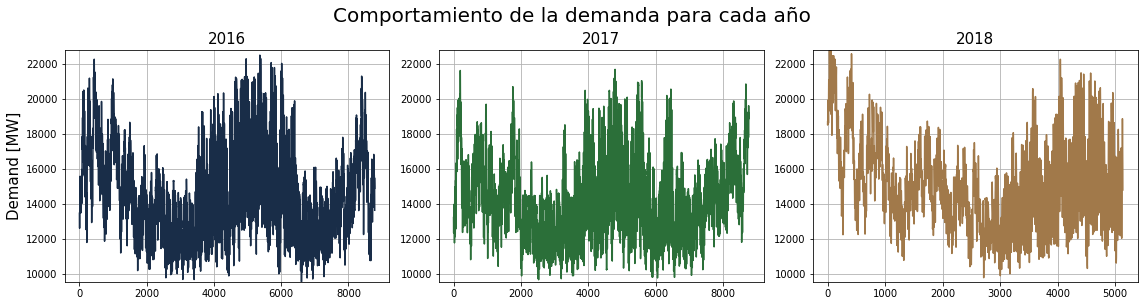

In [5]:
plt.rcParams["figure.figsize"]=[16,4] # Ajustar tamaño del gráfico 
plt.suptitle("Comportamiento de la demanda para cada año",y=1.05,size=20) #Título conj. grafs.
for i in range(max(time.year)-min(time.year)+1):
    plt.subplot(1,3,i+1)
    plt.plot(MW_per_year[i],color=cols[i])
    plt.title(str(years[i]),size=15)
    plt.tight_layout() # <- ayuda a ordenar ejes
    plt.ylim([np.min(df.AEP_MW),np.max(df.AEP_MW)]) # <- Podremos comparar la amplitud de 
#                                                        los distintos años visualmente
    if i==0: #Economizar notación labels
        plt.ylabel("Demand [MW]",size=15)
    plt.grid()
plt.show()

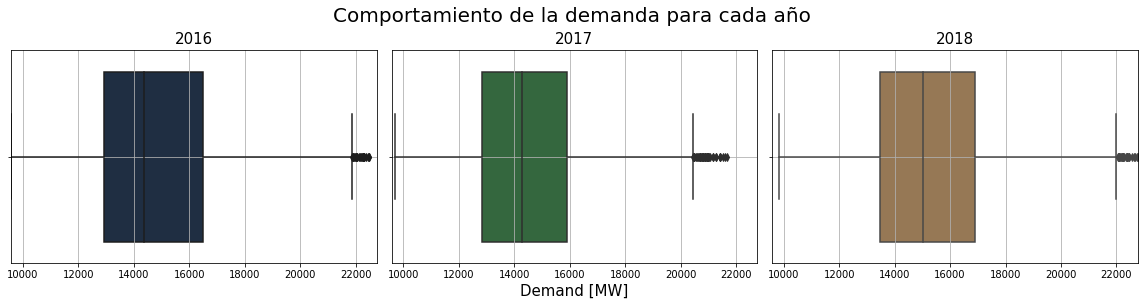

In [6]:
plt.rcParams["figure.figsize"]=[16,4] # Ajustar tamaño del gráfico 
plt.suptitle("Comportamiento de la demanda para cada año",y=1.05,size=20) #Título conj. grafs.
for i in range(max(time.year)-min(time.year)+1):
    plt.subplot(1,3,i+1)
    sns.boxplot(MW_per_year[i],color=cols[i])
    plt.title(str(years[i]),size=15)
    plt.tight_layout() # <- ayuda a ordenar ejes
    plt.xlim([np.min(df.AEP_MW),np.max(df.AEP_MW)]) # <- Podremos comparar la amplitud de 
#                                                        los distintos años visualmente
    if i==1: #Economizar notación labels
        plt.xlabel("Demand [MW]",size=15)
    plt.grid()
plt.show()

Al visualizar los registros por año es notorio el incremento en la media del 2018, aunque el rango se mantenga casi estable. Esto se puede ver en ambos gráficos.

In [7]:
MW_per_dayofyear=[]
dayofyears=np.linspace(min(time.dayofyear),max(time.dayofyear),max(time.dayofyear)-min(time.dayofyear)+1,dtype="int")
for i in dayofyears:
    MW_per_dayofyear.append(np.asarray(df.AEP_MW[time.dayofyear==i]))

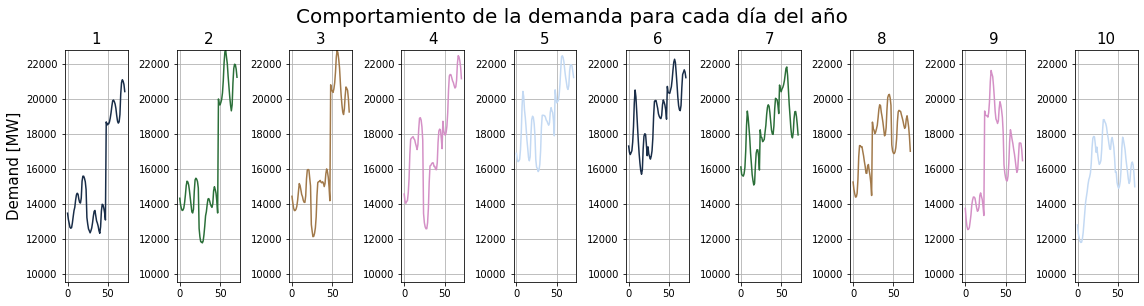

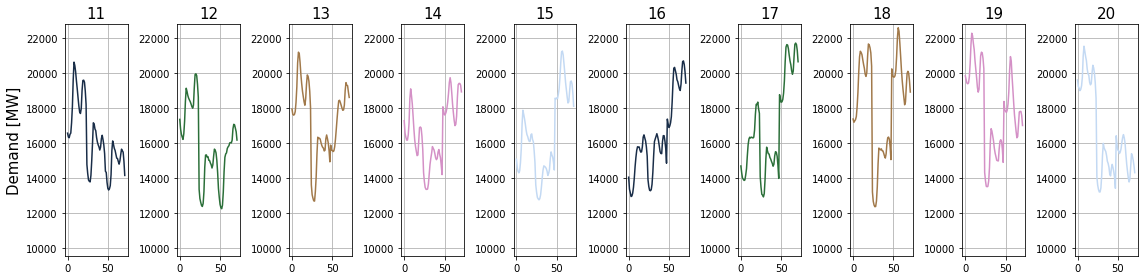

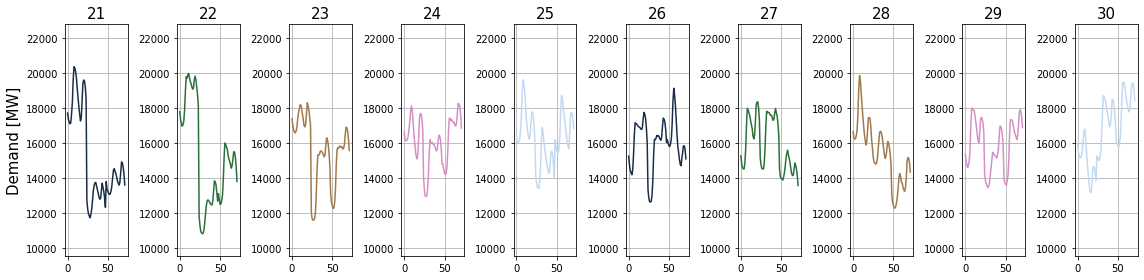

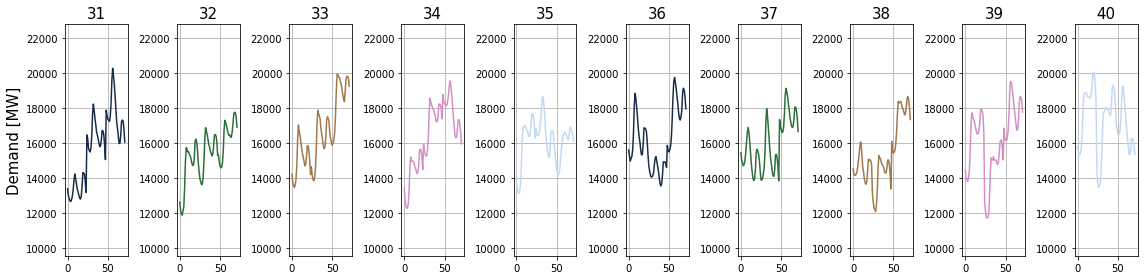

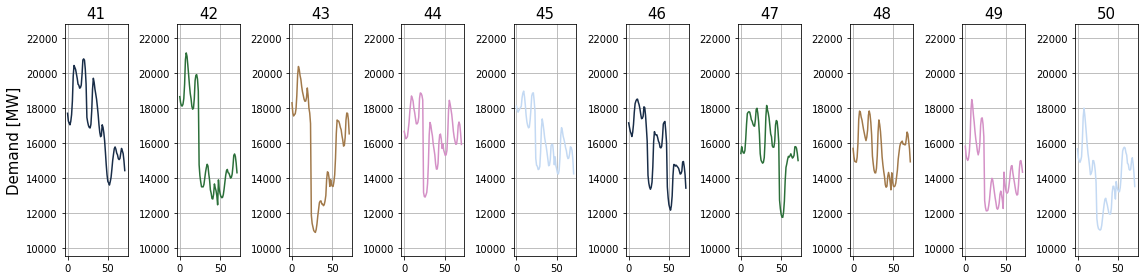

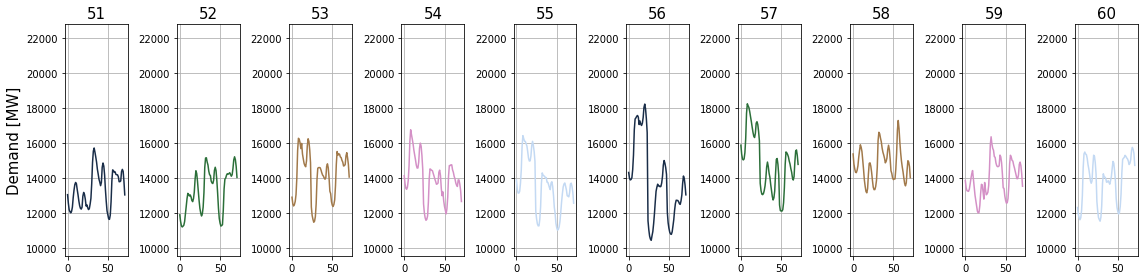

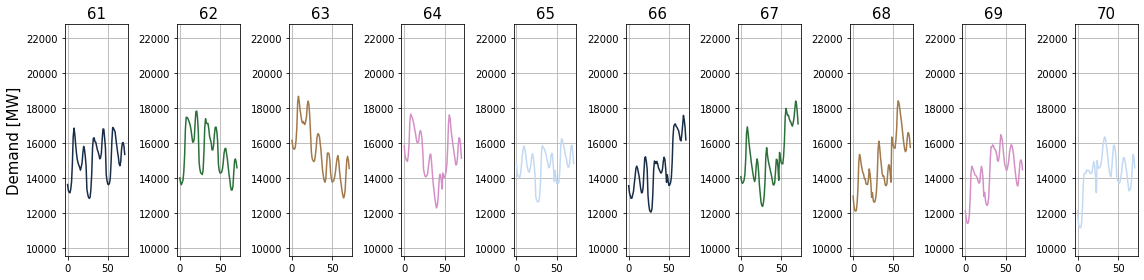

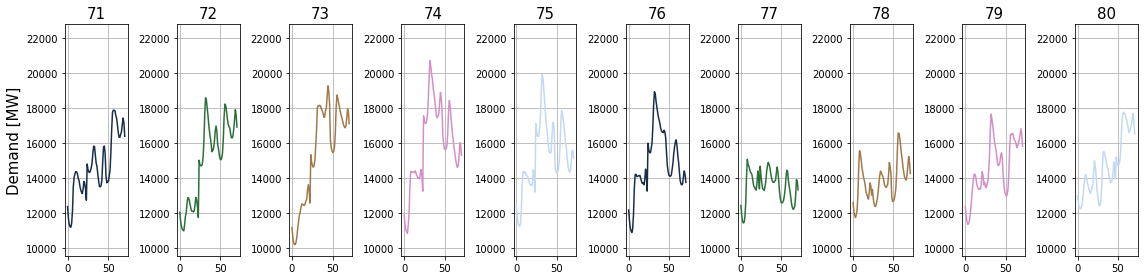

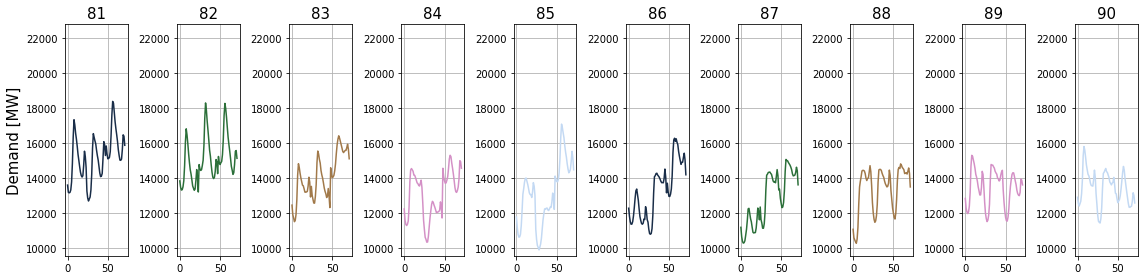

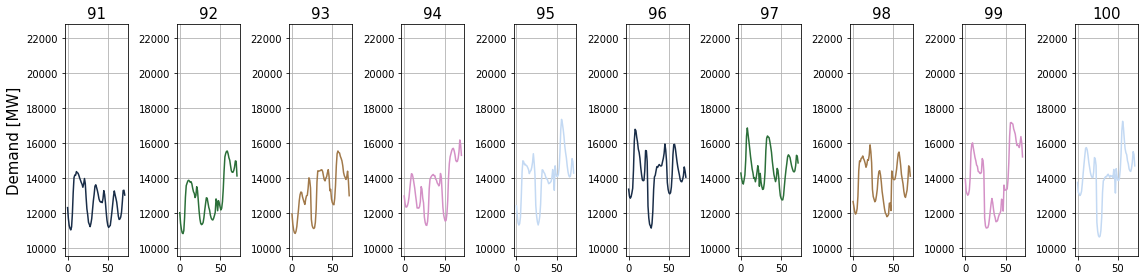

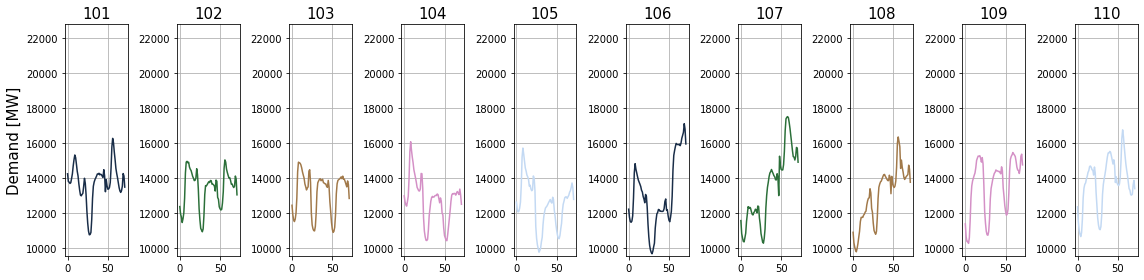

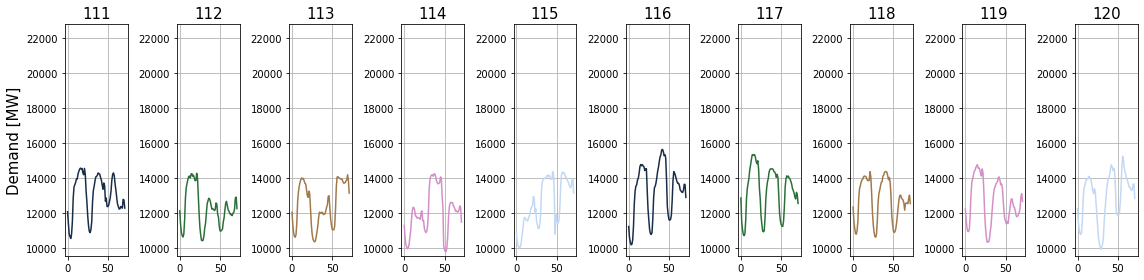

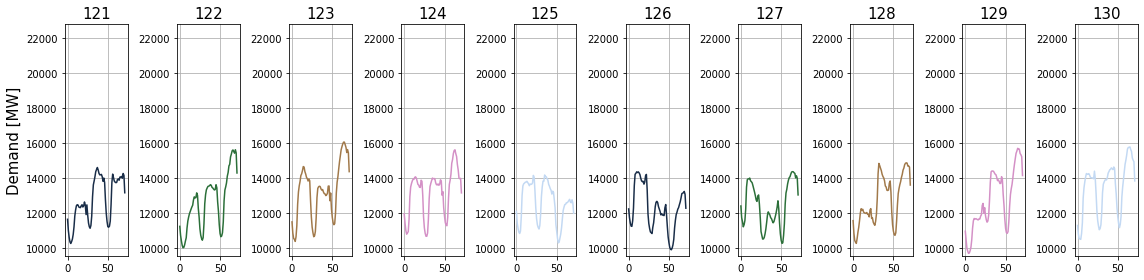

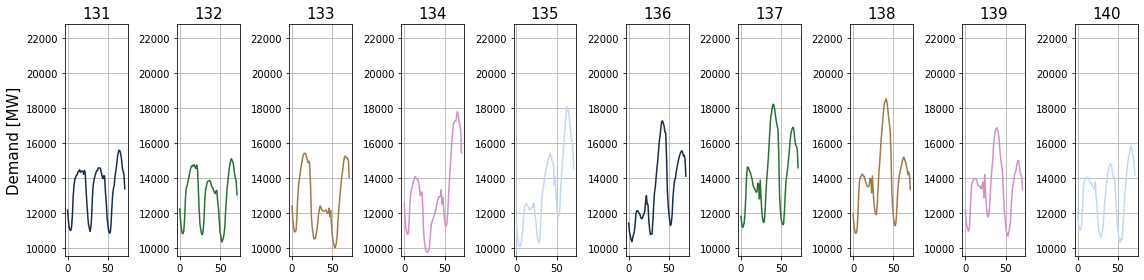

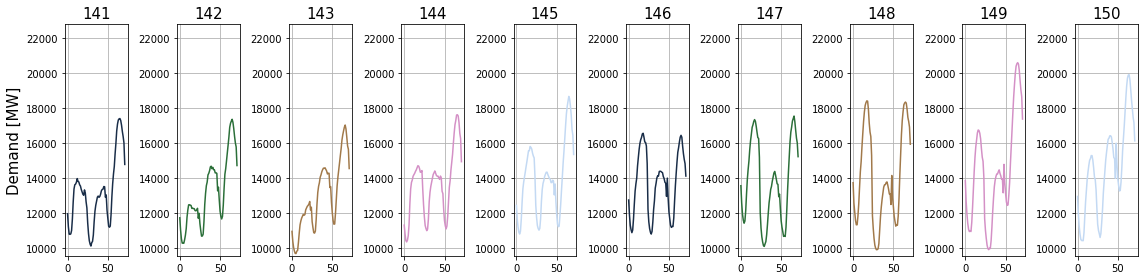

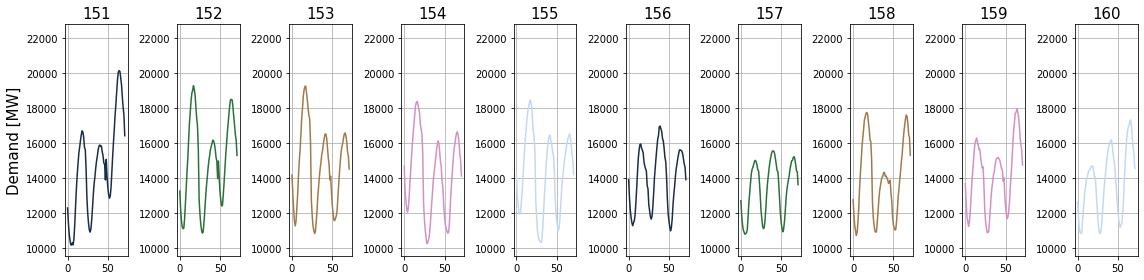

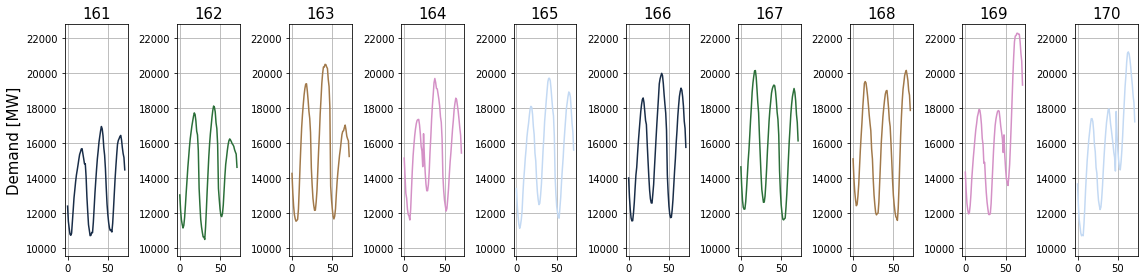

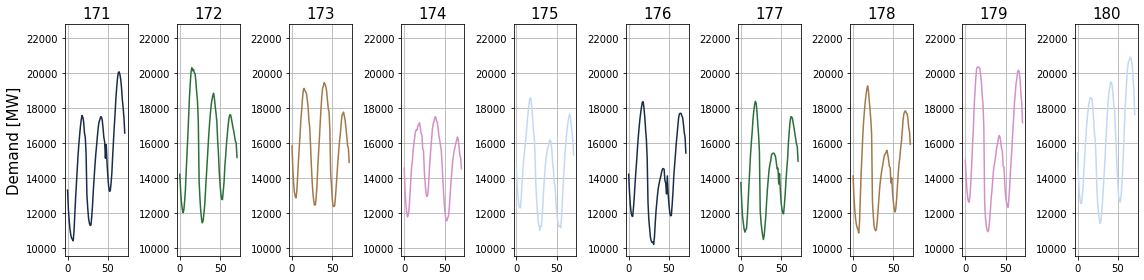

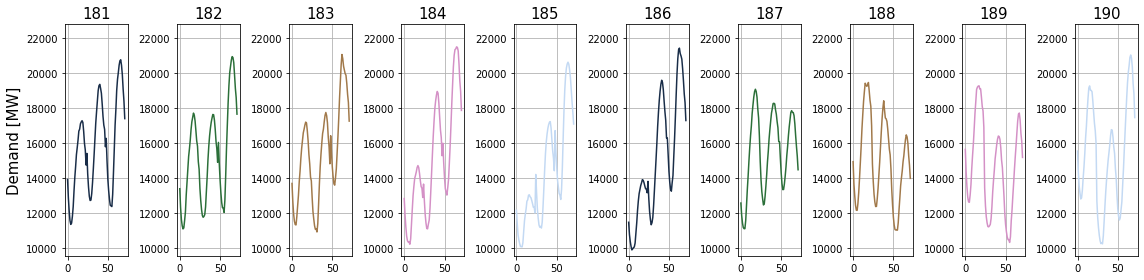

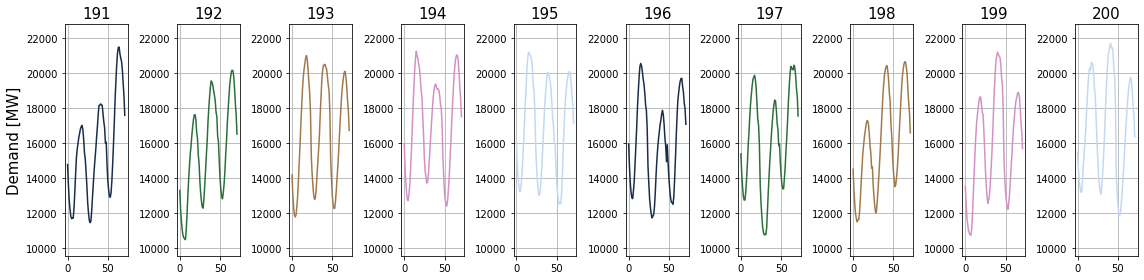

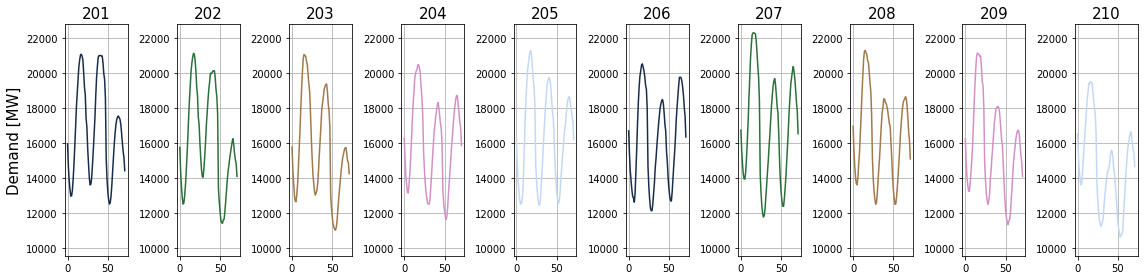

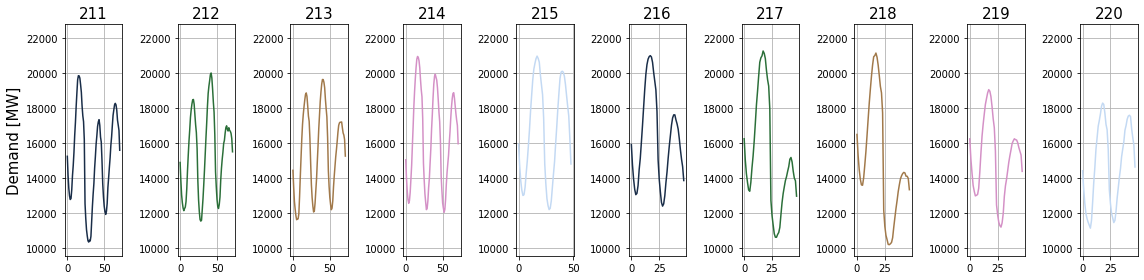

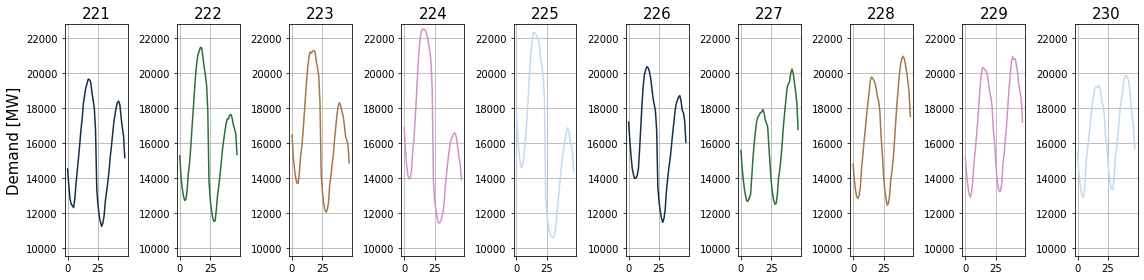

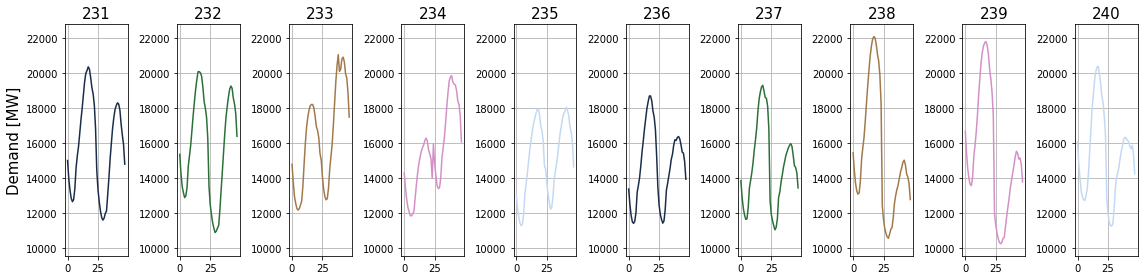

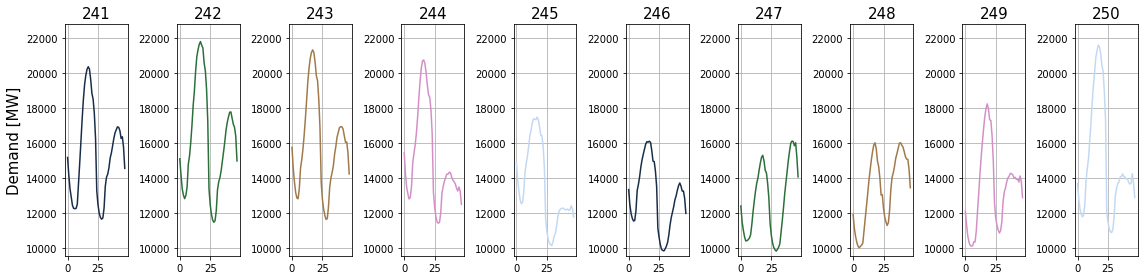

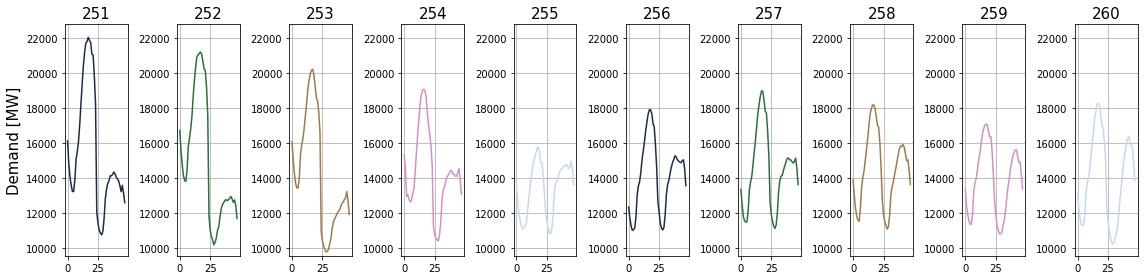

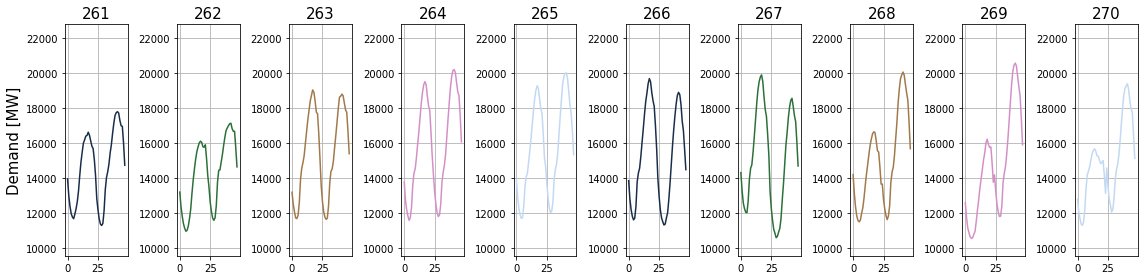

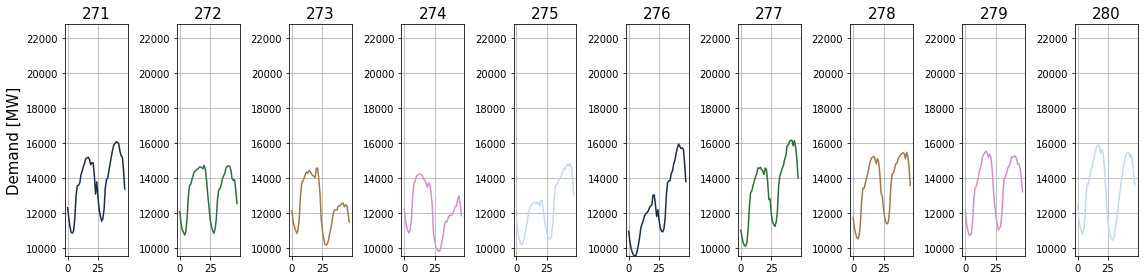

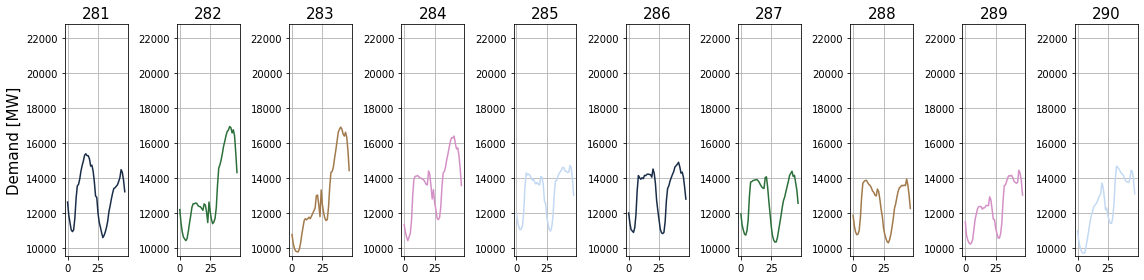

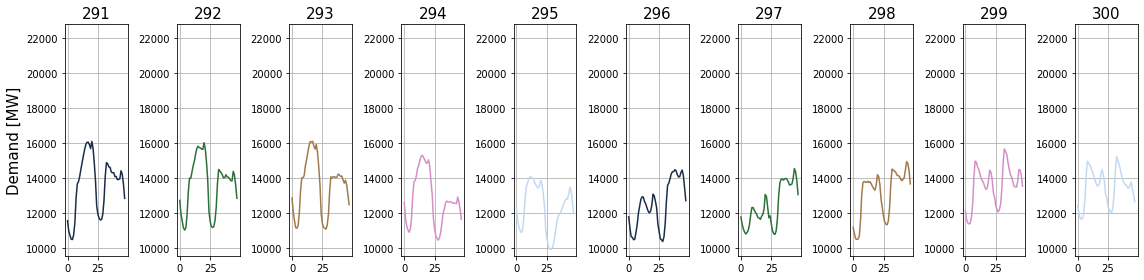

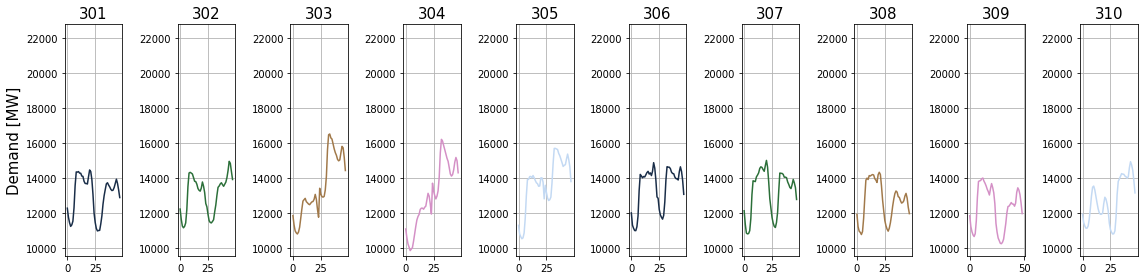

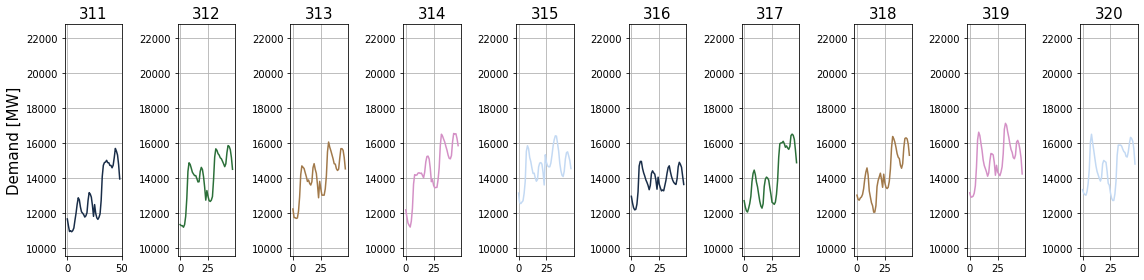

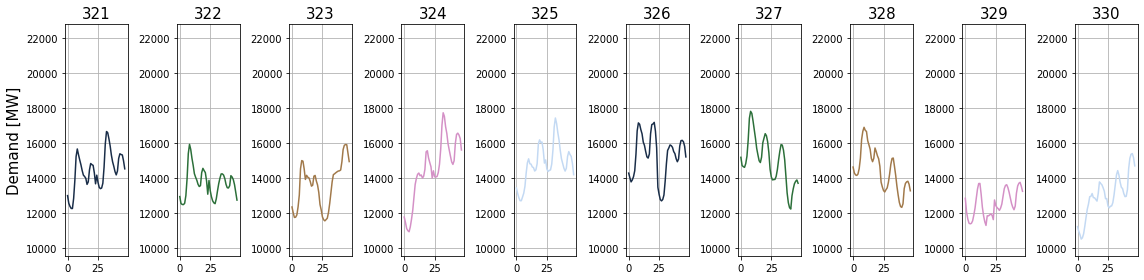

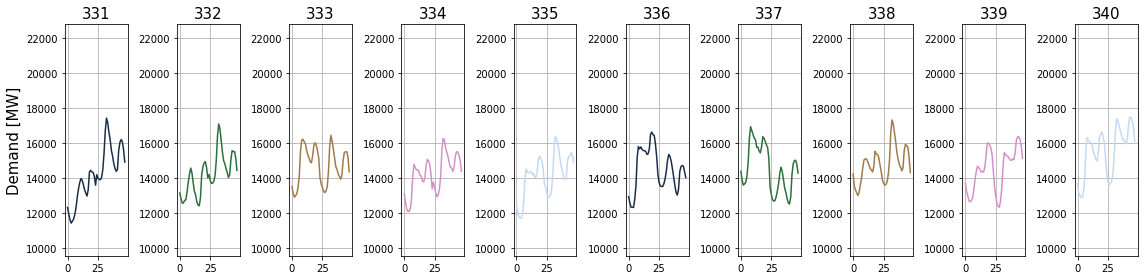

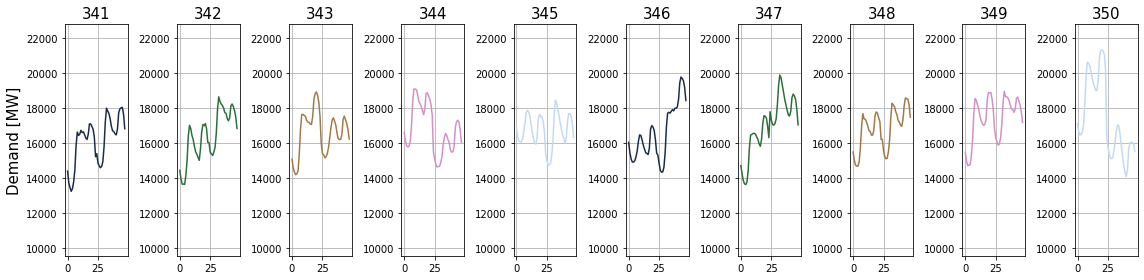

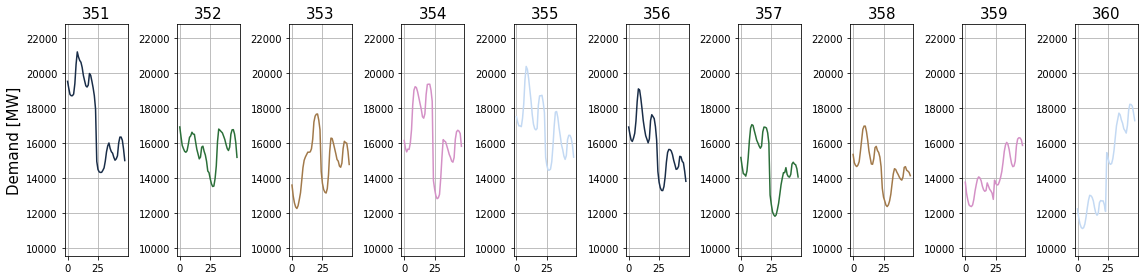

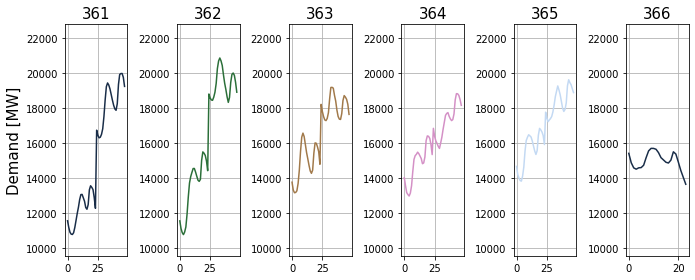

In [8]:
plt.rcParams["figure.figsize"]=[16,4] # Ajustar tamaño del gráfico 
plt.suptitle("Comportamiento de la demanda para cada día del año",y=1.05,size=20) #Título conj. grafs.
k = 1
cant = 10
for i in range(max(time.dayofyear)-min(time.dayofyear)+1):
    plt.subplot(1,cant,k)
    plt.plot(MW_per_dayofyear[i], color = cols[i%5])
    plt.title(str(dayofyears[i]),size=15)
    plt.tight_layout() # <- ayuda a ordenar ejes
    plt.ylim([np.min(df.AEP_MW),np.max(df.AEP_MW)]) # <- Podremos comparar la amplitud de 
#                                                        los distintos años visualmente
    if i%cant==0: #Economizar notación labels
        plt.ylabel("Demand [MW]",size=15)
    plt.grid()
    if k == cant:
        k = 1
        plt.show()
    else:
        k += 1

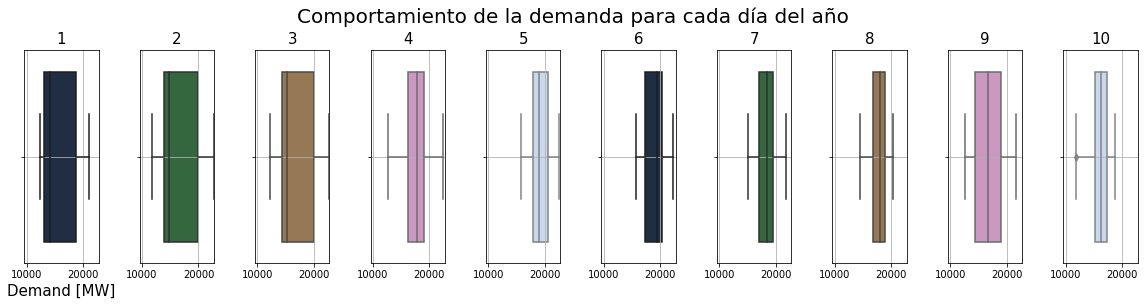

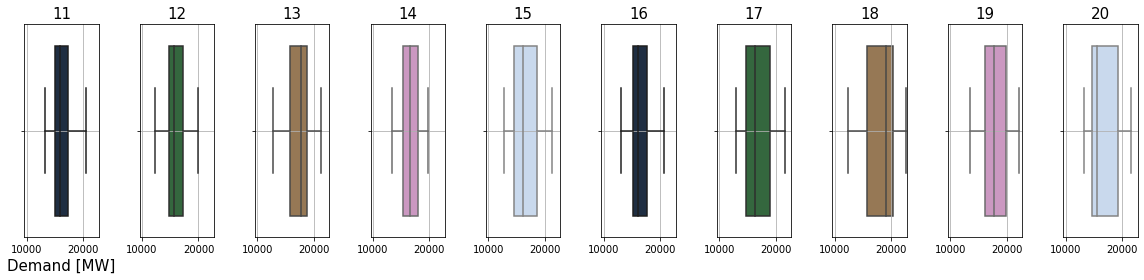

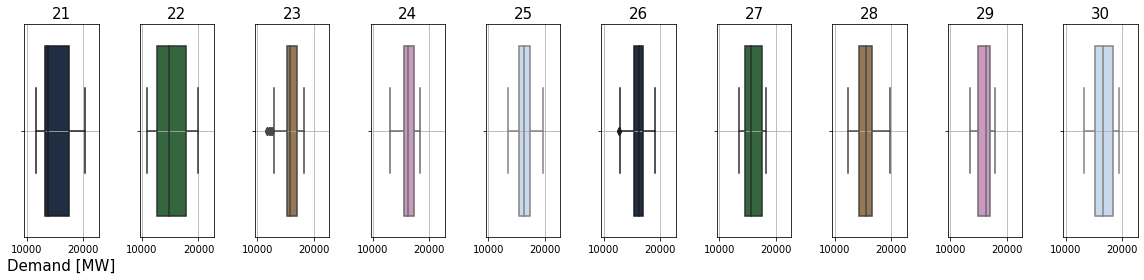

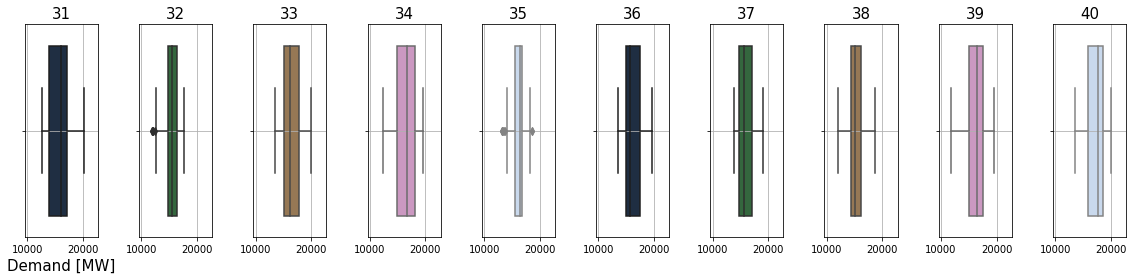

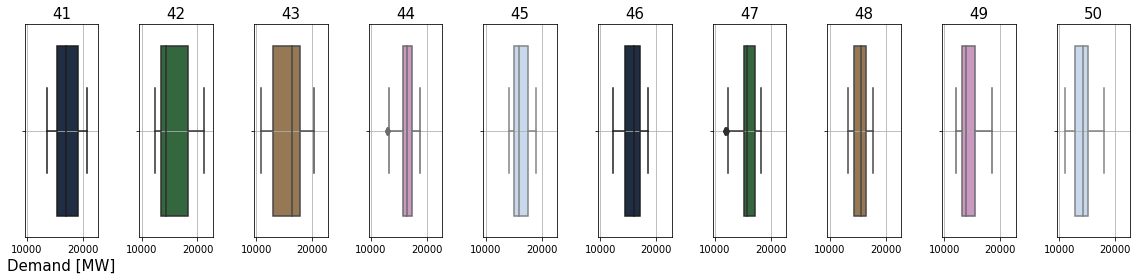

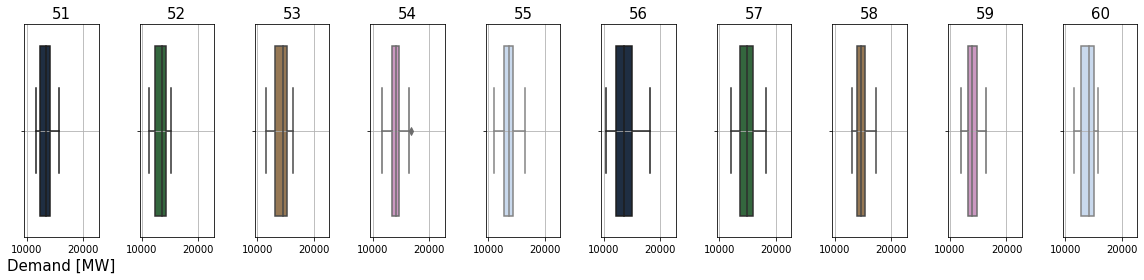

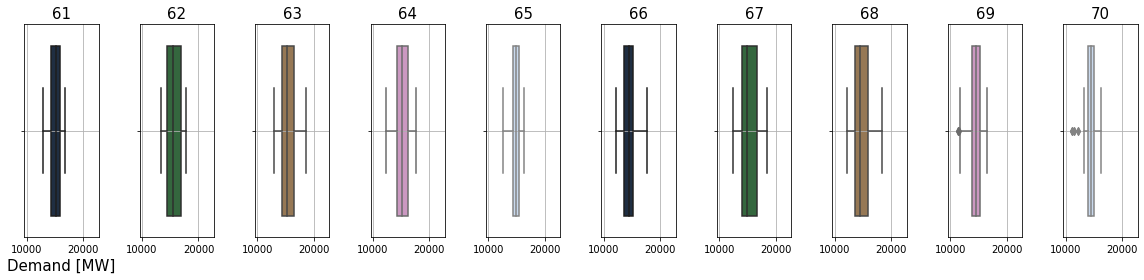

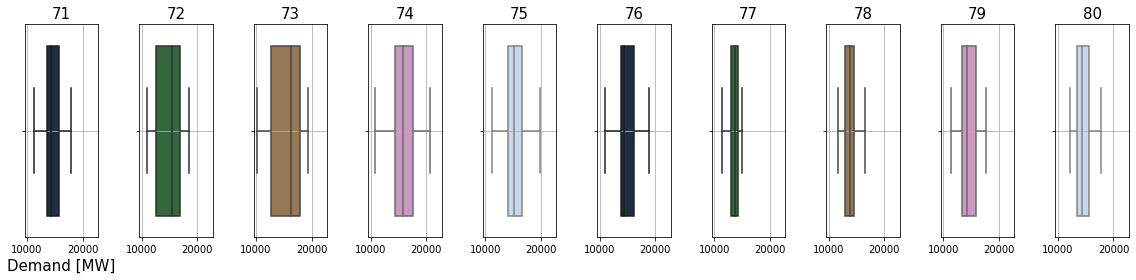

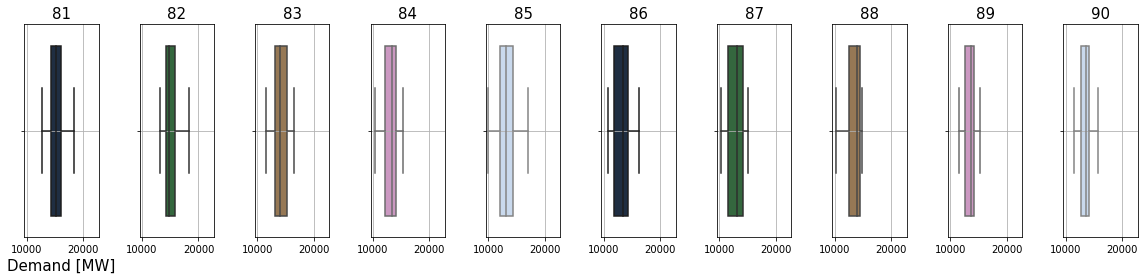

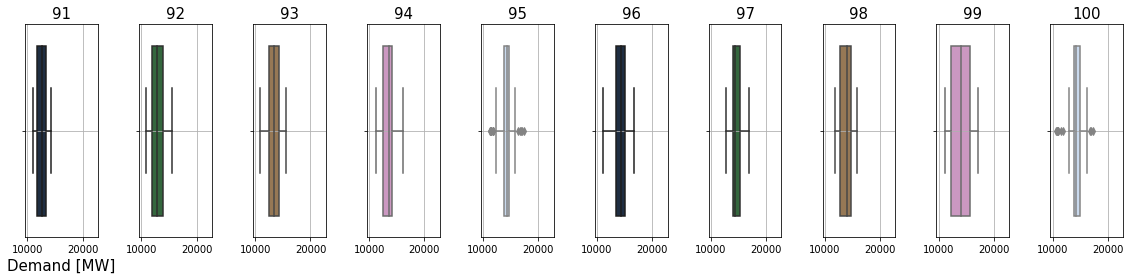

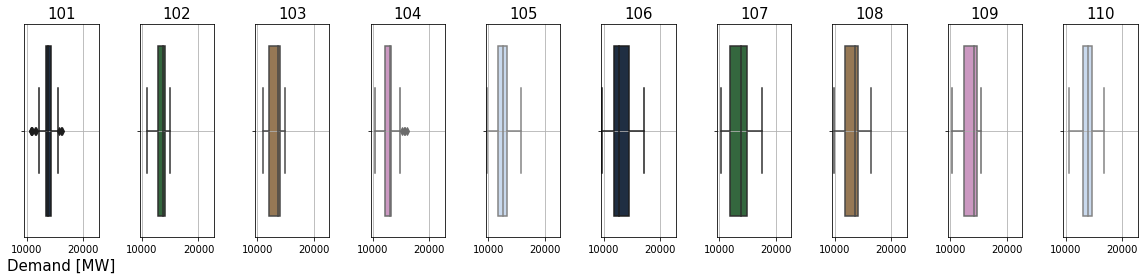

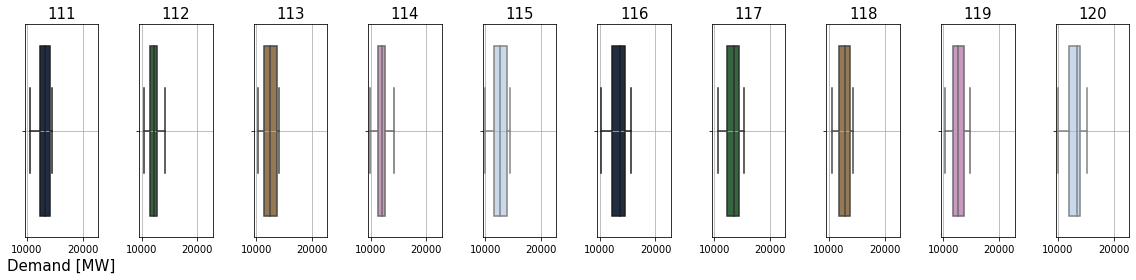

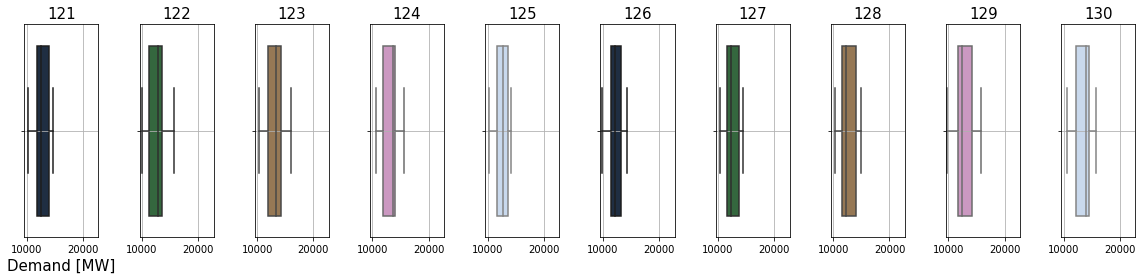

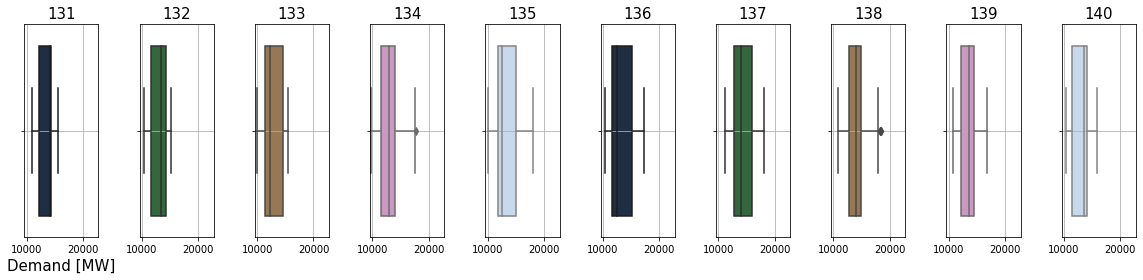

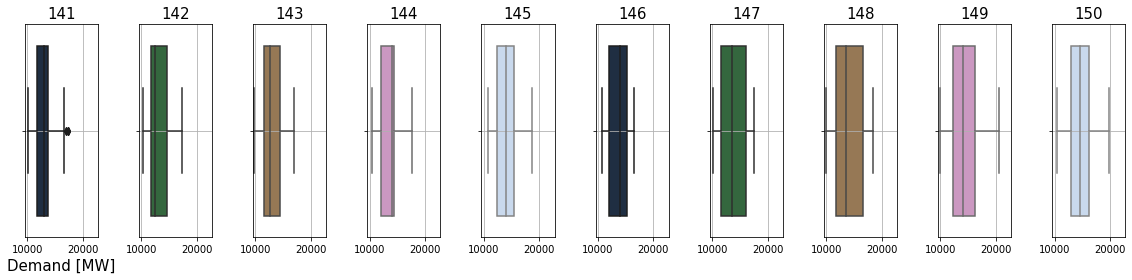

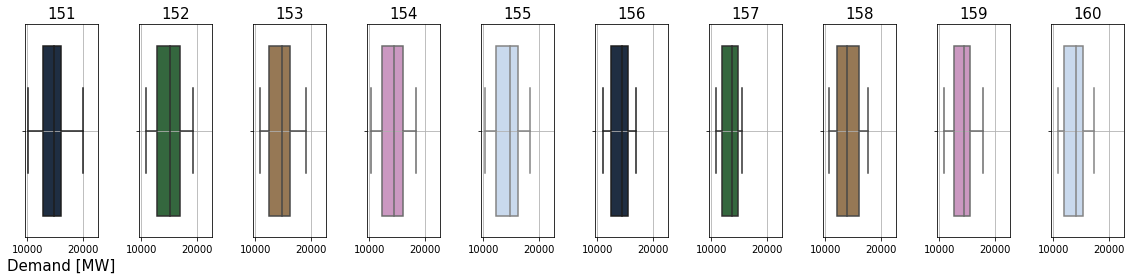

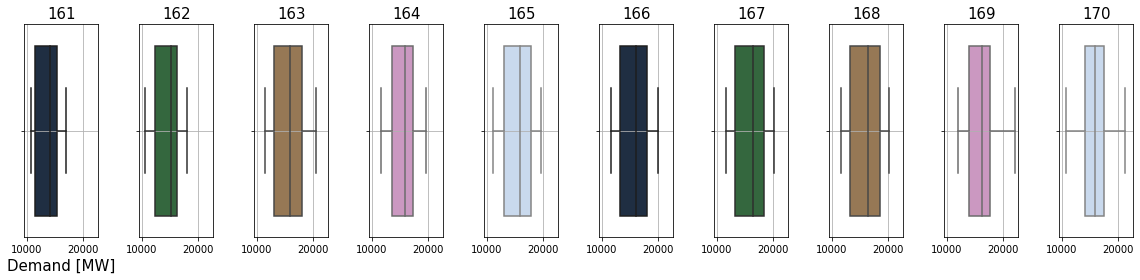

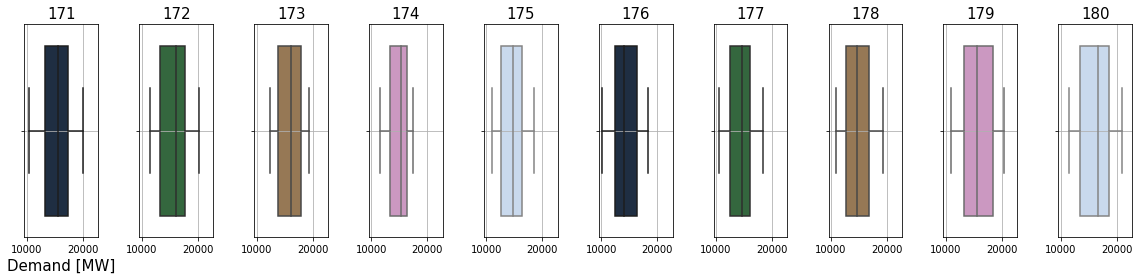

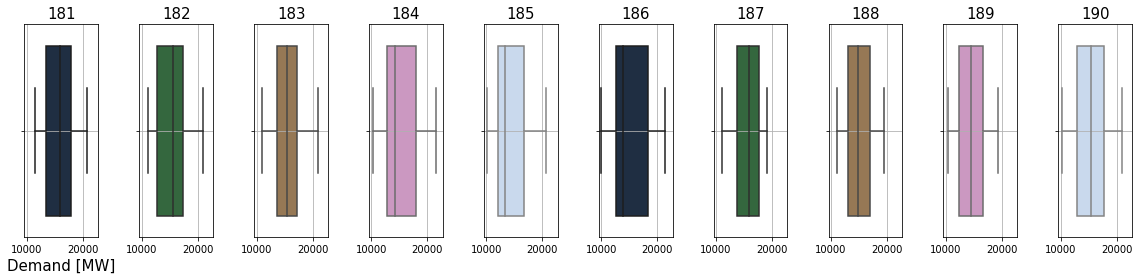

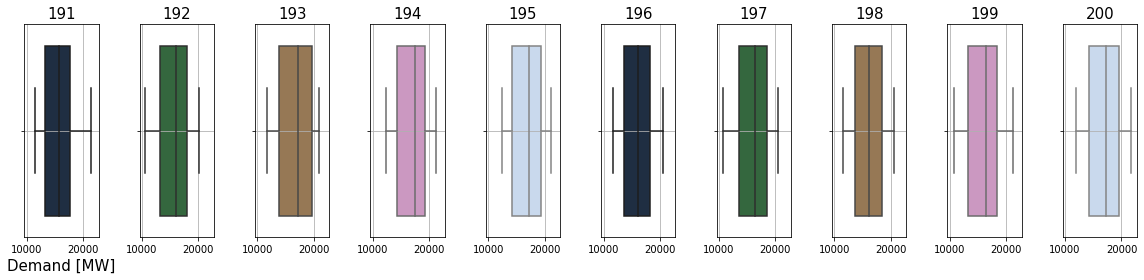

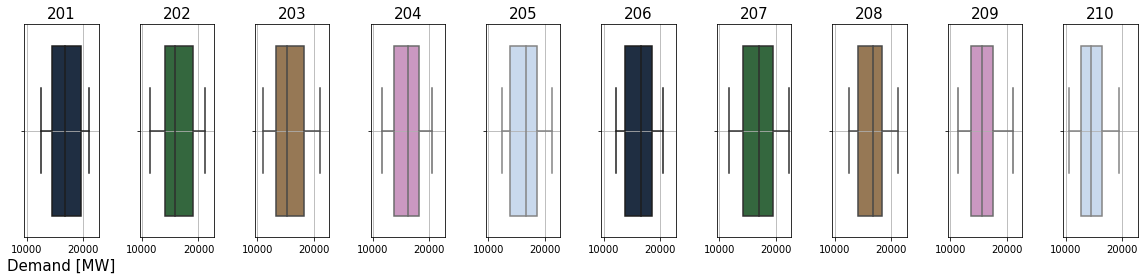

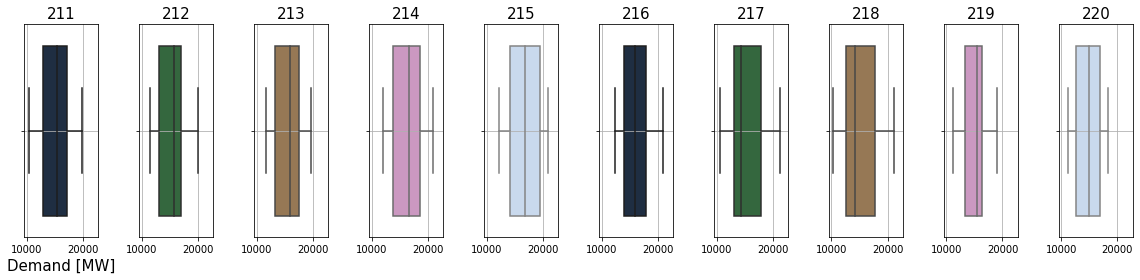

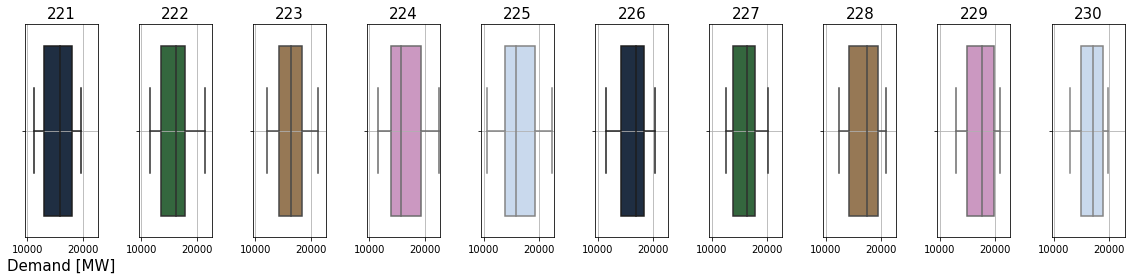

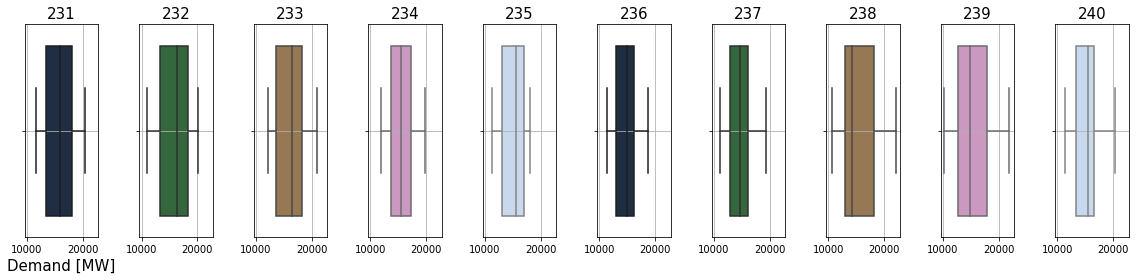

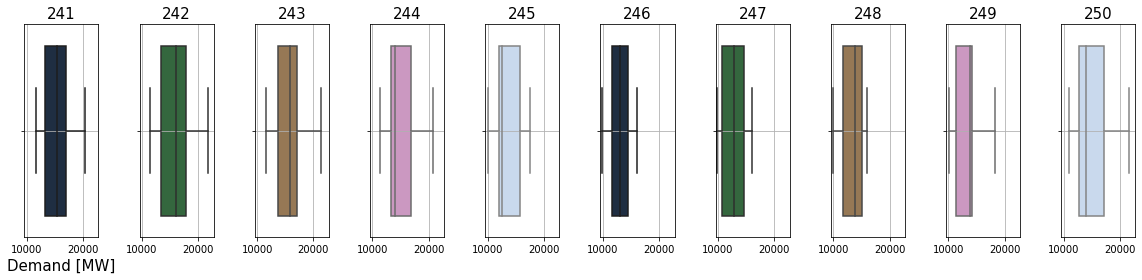

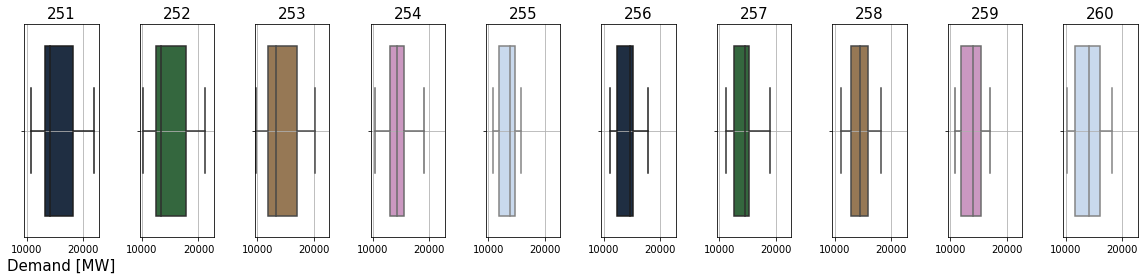

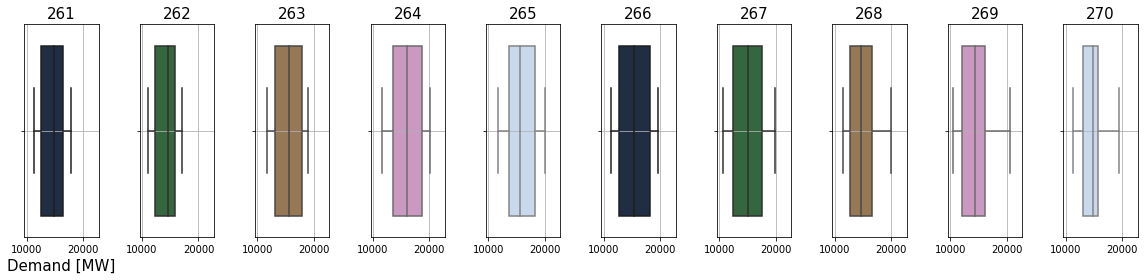

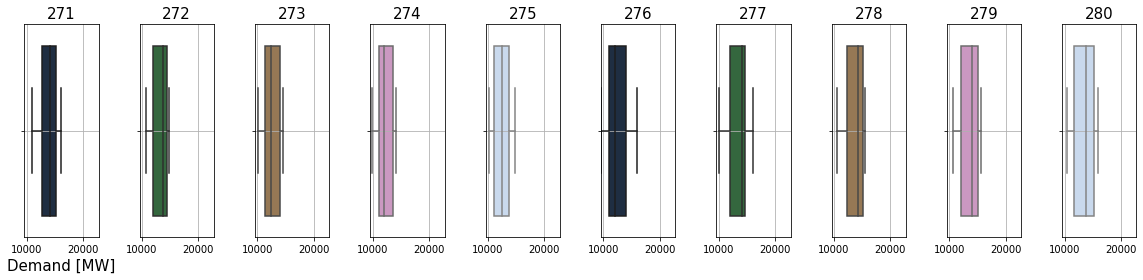

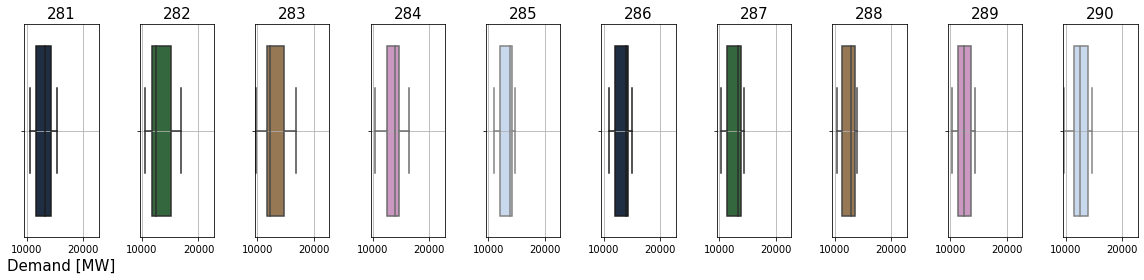

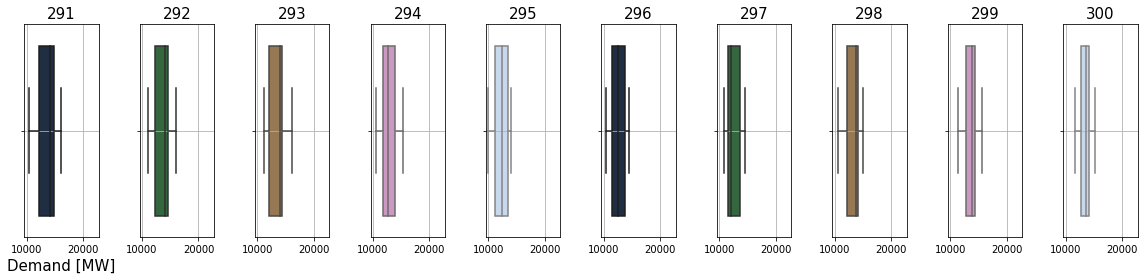

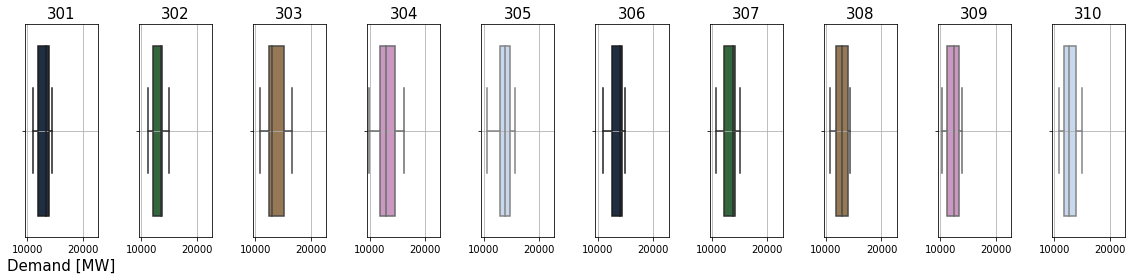

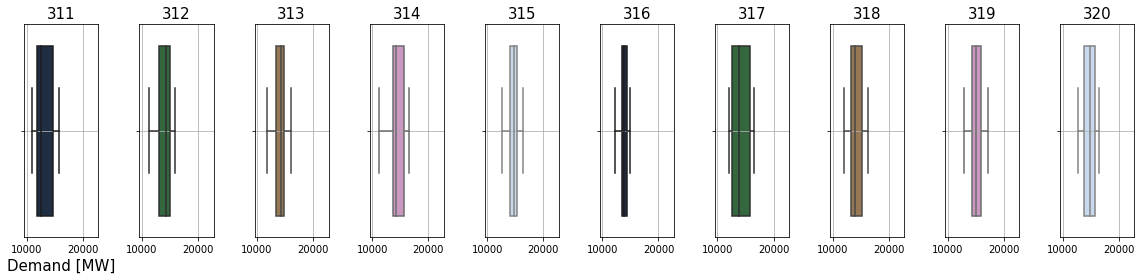

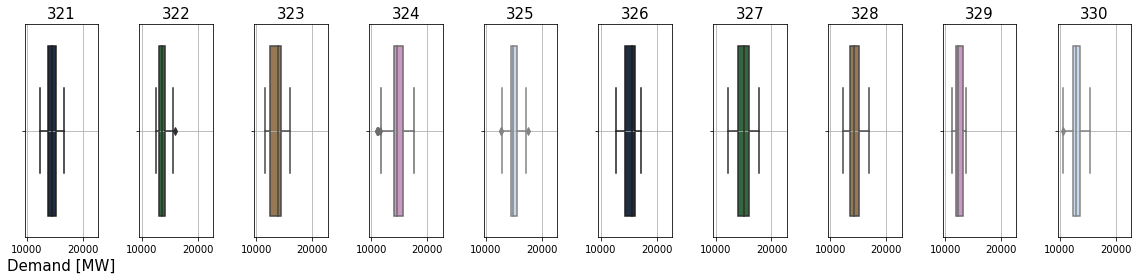

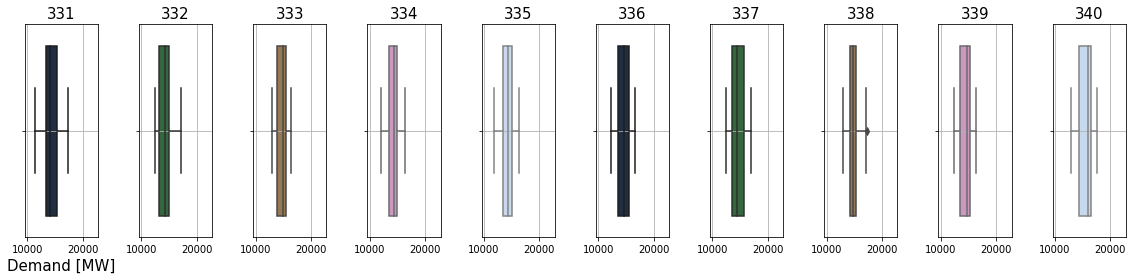

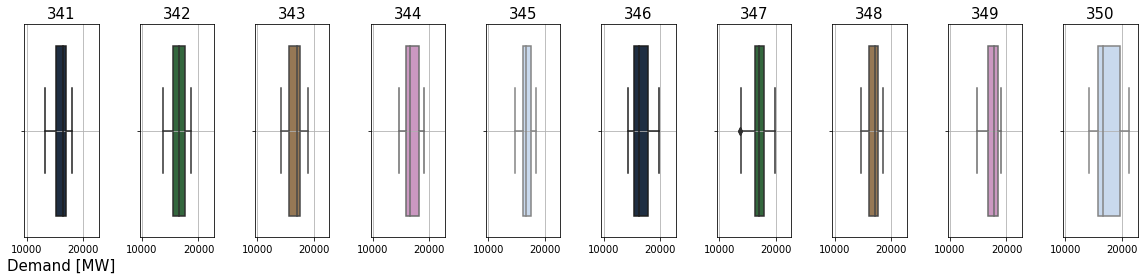

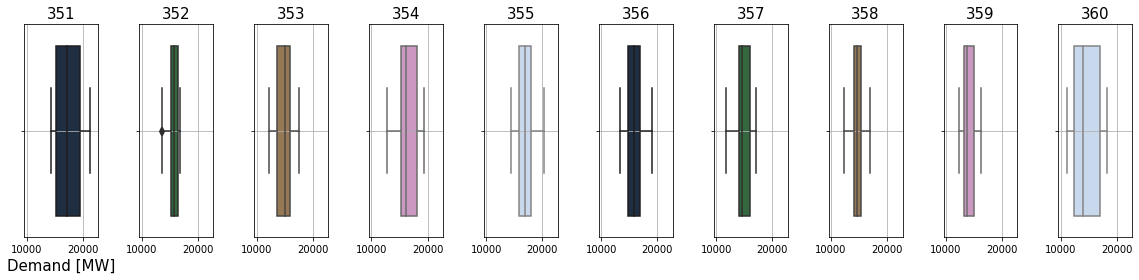

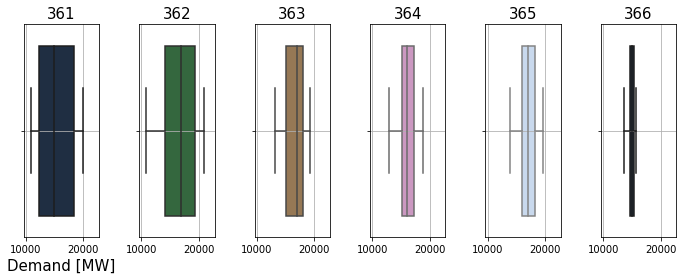

In [9]:
plt.rcParams["figure.figsize"]=[16,4] # Ajustar tamaño del gráfico 
plt.suptitle("Comportamiento de la demanda para cada día del año",y=1.05,size=20) #Título conj. grafs.
k = 1
cant = 10
for i in range(max(time.dayofyear)-min(time.dayofyear)+1):
    plt.subplot(1,cant,k)
    sns.boxplot(MW_per_dayofyear[i], color = cols[i%5])
    plt.title(str(dayofyears[i]),size=15)
    plt.tight_layout() # <- ayuda a ordenar ejes
    plt.xlim([np.min(df.AEP_MW),np.max(df.AEP_MW)]) # <- Podremos comparar la amplitud de 
#                                                        los distintos años visualmente
    if i%cant==0: #Economizar notación labels
        plt.xlabel("Demand [MW]",size=15)
    plt.grid()
    if k == cant:
        k = 1
        plt.show()
    else:
        k += 1

Este tipo de visualización es más complicada debido a que son muchos datos a comparar, por lo que sólo se puede notar como varían los consumos dependiendo del día, por lo que da una señal de lo complicado que es predecir el consumo de un día X por la variabilidad de el registro.

In [10]:
MW_per_dayofweek=[]
dayofweek=np.linspace(min(time.dayofweek),max(time.dayofweek),max(time.dayofweek)-min(time.dayofweek)+1,dtype="int")
for i in dayofweek:
    MW_per_dayofweek.append(np.asarray(df.AEP_MW[time.dayofweek==i]))

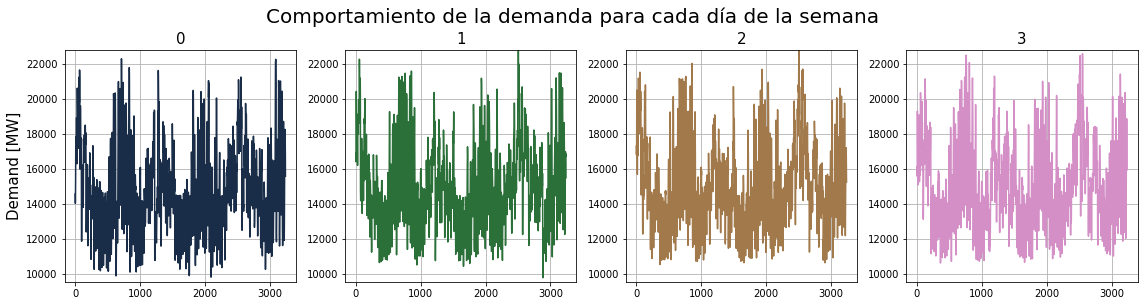

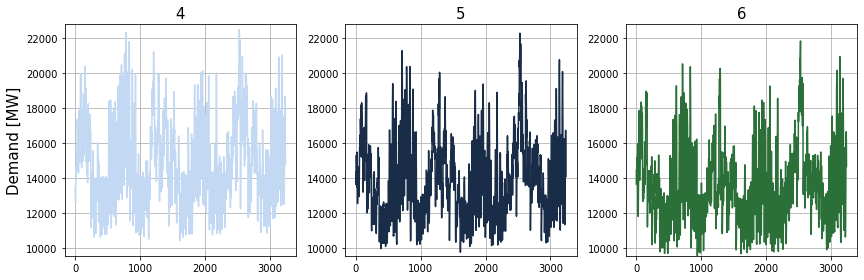

In [11]:
plt.rcParams["figure.figsize"]=[16,4] # Ajustar tamaño del gráfico 
plt.suptitle("Comportamiento de la demanda para cada día de la semana",y=1.05,size=20) #Título conj. grafs.
k = 1
cant = 4
for i in range(max(time.dayofweek)-min(time.dayofweek)+1):
    plt.subplot(1,cant,k)
    plt.plot(MW_per_dayofweek[i], color = cols[i%5])
    plt.title(str(dayofweek[i]),size=15)
    plt.tight_layout() # <- ayuda a ordenar ejes
    plt.ylim([np.min(df.AEP_MW),np.max(df.AEP_MW)]) # <- Podremos comparar la amplitud de 
#                                                        los distintos años visualmente
    if i%cant==0: #Economizar notación labels
        plt.ylabel("Demand [MW]",size=15)
    plt.grid()
    if k == cant:
        k = 1
        plt.show()
    else:
        k += 1


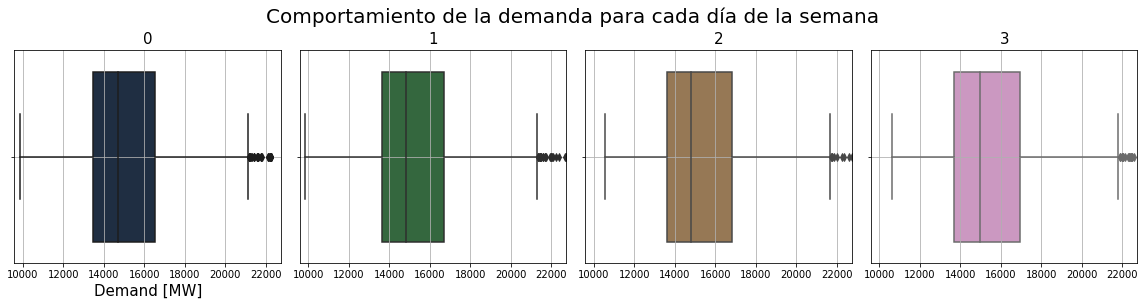

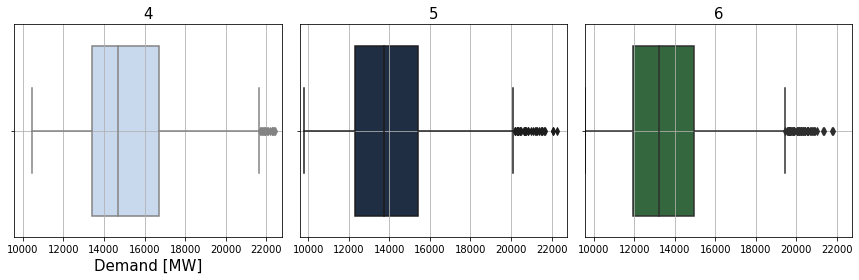

In [12]:
plt.rcParams["figure.figsize"]=[16,4] # Ajustar tamaño del gráfico 
plt.suptitle("Comportamiento de la demanda para cada día de la semana",y=1.05,size=20) #Título conj. grafs.
k = 1
cant = 4
for i in range(max(time.dayofweek)-min(time.dayofweek)+1):
    plt.subplot(1,cant,k)
    sns.boxplot(MW_per_dayofweek[i], color = cols[i%5])
    plt.title(str(dayofweek[i]),size=15)
    plt.tight_layout() # <- ayuda a ordenar ejes
    plt.xlim([np.min(df.AEP_MW),np.max(df.AEP_MW)]) # <- Podremos comparar la amplitud de 
#                                                        los distintos años visualmente
    if i%cant==0: #Economizar notación labels
        plt.xlabel("Demand [MW]",size=15)
    plt.grid()
    if k == cant:
        k = 1
        plt.show()
    else:
        k += 1

Con esta distrubución de tiempo, se aprecia la aparente constancia de consumo en la semana, aunque también se nota un ligero decenso de consumo el fin de semana (días 5 y 6)

In [13]:
MW_per_hour=[]
hour=np.linspace(min(time.hour),max(time.hour),max(time.hour)-min(time.hour)+1,dtype="int")
for i in hour:
    MW_per_hour.append(np.asarray(df.AEP_MW[time.hour==i]))

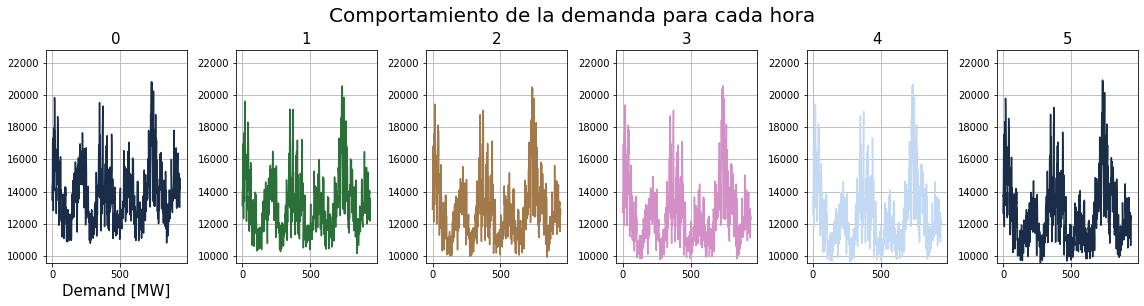

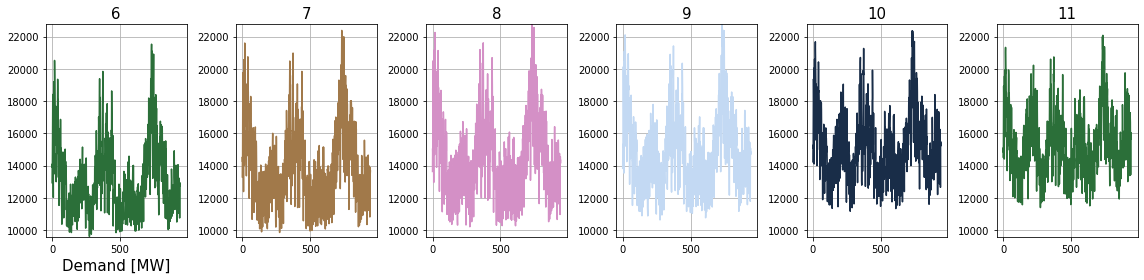

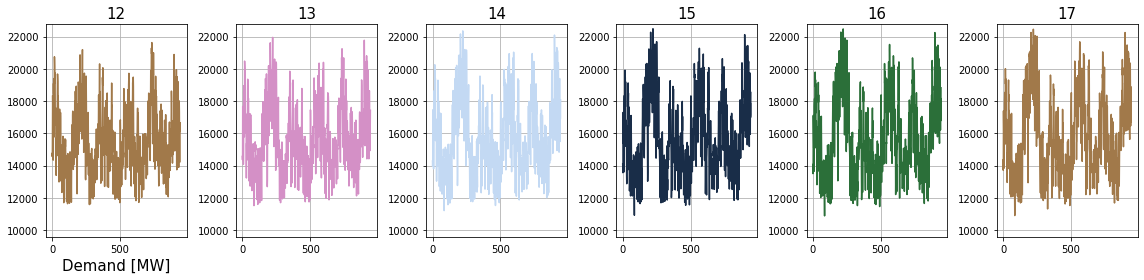

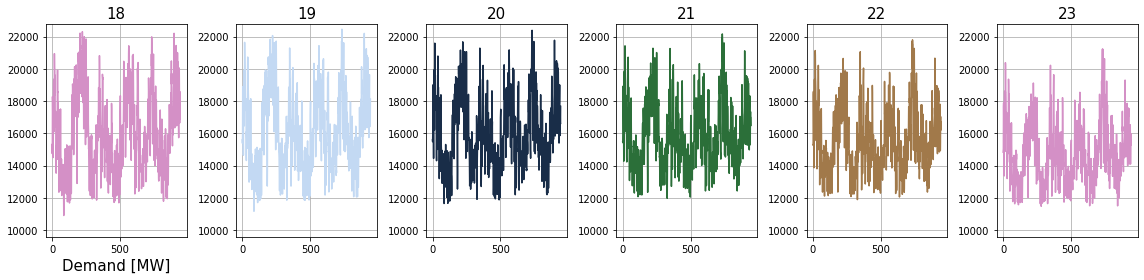

In [14]:
plt.rcParams["figure.figsize"]=[16,4] # Ajustar tamaño del gráfico 
plt.suptitle("Comportamiento de la demanda para cada hora",y=1.05,size=20) #Título conj. grafs.
k = 1
cant = 6
for i in range(max(time.hour)-min(time.hour)+1):
    plt.subplot(1,cant,k)
    plt.plot(MW_per_hour[i], color = cols[i%5])
    plt.title(str(hour[i]),size=15)
    plt.tight_layout() # <- ayuda a ordenar ejes
    plt.ylim([np.min(df.AEP_MW),np.max(df.AEP_MW)]) # <- Podremos comparar la amplitud de 
#                                                        los distintos años visualmente
    if i%cant==0: #Economizar notación labels
        plt.xlabel("Demand [MW]",size=15)
    plt.grid()
    if k == cant:
        k = 1
        plt.show()
    else:
        k += 1

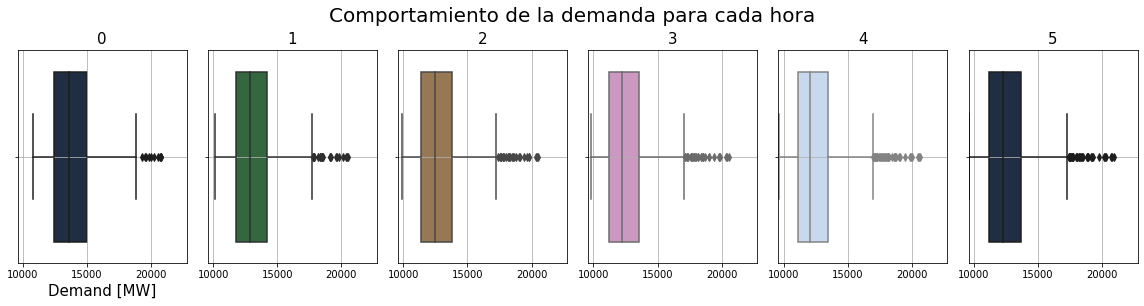

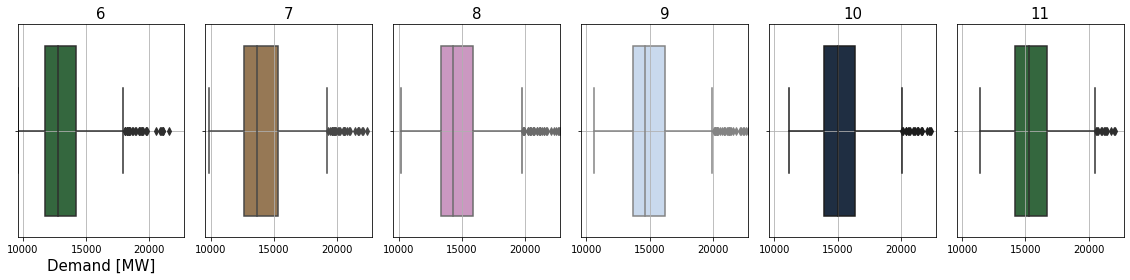

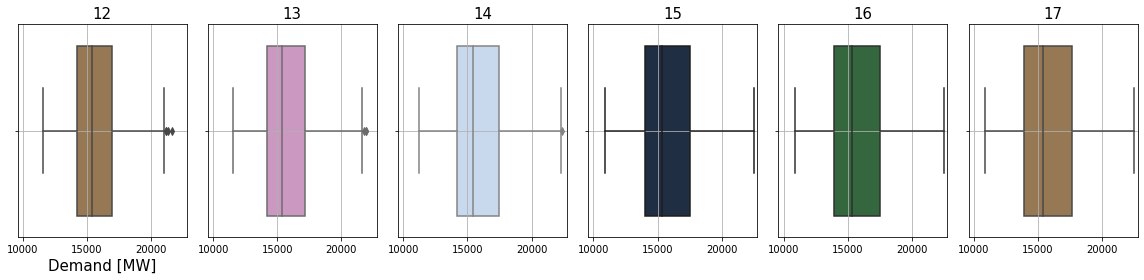

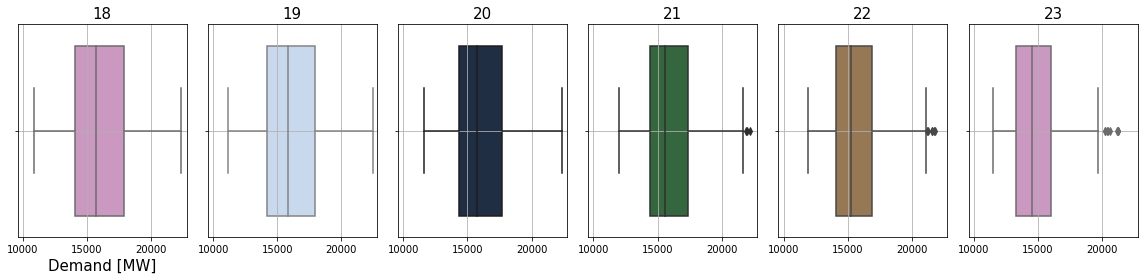

In [15]:
plt.rcParams["figure.figsize"]=[16,4] # Ajustar tamaño del gráfico 
plt.suptitle("Comportamiento de la demanda para cada hora",y=1.05,size=20) #Título conj. grafs.
k = 1
cant = 6
for i in range(max(time.hour)-min(time.hour)+1):
    plt.subplot(1,cant,k)
    sns.boxplot(MW_per_hour[i], color = cols[i%5])
    plt.title(str(hour[i]),size=15)
    plt.tight_layout() # <- ayuda a ordenar ejes
    plt.xlim([np.min(df.AEP_MW),np.max(df.AEP_MW)]) # <- Podremos comparar la amplitud de 
#                                                        los distintos años visualmente
    if i%cant==0: #Economizar notación labels
        plt.xlabel("Demand [MW]",size=15)
    plt.grid()
    if k == cant:
        k = 1
        plt.show()
    else:
        k += 1

En esta parte se ve como el consumo varía con la hora, aumentando entre las 7 y las 23, siendo el pick entre las 15 y las 18 hrs.

#### 1.b Preprocesamiento de los datos

i) Para realizar predicciones 24 horas adelante usaremos las últimas 24 observaciones de demanda (demanda = consumo de potencia eléctrica) y la representación cronológica de la última observación. Utilice el siguiente código para crear las variables de entrada y salida utlizando el dataset original ordenado (No es necesario modificar el código).

In [16]:
df=pd.read_csv("gdrive/My Drive/AEP_hourly.csv")
df["Datetime"]=pd.to_datetime(df.Datetime,infer_datetime_format=True)
df=df.sort_values(by='Datetime') #para ordenar la data
df=df.iloc[np.where(df.Datetime=="2016-01-01 00:00:00")[0][0]:,:]
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [17]:
inp,out=split_sequence(np.asarray(df),24,24)

Debiese obtener una salida de la siguiente forma: 

Input shape:
  (22633, 24, 2) [Cant. de recortes serie de tiempo generados, largo serie de tiempo, (timeindex,MW)]

Output shape:
 (22633, 24, 2) [Cant. de recortes serie de tiempo generados, largo serie de tiempo, (timeindex,MW)]

ii) Antes de eliminar el time index en la tercera dimensión, lo utilizaremos para crear "relojes" para la hora, día de la semana, y día del año de la última observación. Utilice el siguiente código para generar X e Y.

In [18]:
from math import *
hour_1=np.asarray(np.sin(2*pi*pd.to_datetime(inp[:,-1,0]).hour/24)).reshape(-1,1)
hour_2=np.asarray(np.cos(2*pi*pd.to_datetime(inp[:,-1,0]).hour/24)).reshape(-1,1)
week_1=np.asarray(np.sin(2*pi*pd.to_datetime(inp[:,-1,0]).dayofweek/7)).reshape(-1,1)
week_2=np.asarray(np.cos(2*pi*pd.to_datetime(inp[:,-1,0]).dayofweek/7)).reshape(-1,1)
day_1=np.asarray(np.sin(2*pi*pd.to_datetime(inp[:,-1,0]).dayofyear/366)).reshape(-1,1)
day_2=np.asarray(np.cos(2*pi*pd.to_datetime(inp[:,-1,0]).dayofyear/366)).reshape(-1,1)
X=np.concatenate((inp[:,:,1],hour_1,hour_2,week_1,week_2,day_1,day_2),axis=1).copy()
Y=out[:,:,1].copy()

iii) Utilice como conjunto de test los datos desde el año 2018. Cree los conjuntos de entrenamiento y validación de la forma que estime conveniente. Justifique su elección.

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_tst,y_tst=X[pd.to_datetime(out[:,-1,0]).year==2018],Y[pd.to_datetime(out[:,-1,0]).year==2018]
x_tr_val,y_tr_val=X[pd.to_datetime(out[:,-1,0]).year!=2018],Y[pd.to_datetime(out[:,-1,0]).year!=2018]
x_tr,x_val,y_tr,y_val=train_test_split(x_tr_val, y_tr_val, test_size=0.3)

La elección de la división corresponde al 30% de la data para validación, obteniendo una gran cantidad de datos de entrenamiento y una buena porción para validar, siendo esta última la más cercana al periodo 2018, el cual pertenece al conjunto de test.

iv) Estandarice cada una de las columnas de los datos del modo que estime conveniente, justifique su elección.

In [21]:
from sklearn.preprocessing import MinMaxScaler
#Estandar x
x_scaler = MinMaxScaler()
x_scaler.fit(x_tr)
x_tst = pd.DataFrame(x_scaler.transform(x_tst))
x_tr = pd.DataFrame(x_scaler.transform(x_tr))
x_val = pd.DataFrame(x_scaler.transform(x_val))
#Estandar y
y_scaler = MinMaxScaler()
y_scaler.fit(y_tr)
y_tst = pd.DataFrame(y_scaler.transform(y_tst))
y_tr = pd.DataFrame(y_scaler.transform(y_tr))
y_val = pd.DataFrame(y_scaler.transform(y_val))

La eleccción del Standar Scaler va en la comodidad de tener la desviación estándar en 1.

#### 1.c Primer Arbol
i) Entrenaremos ahora un árbol de regresión con produndidad 3, utilizaremos %timeit para obtener el tiempo de entrenamiento. Utilizaremos como métrica para el entrenamiento el Error Absoluto Medio o MAE a lo largo de esta pregunta. 

In [23]:
from sklearn.tree import DecisionTreeRegressor

In [24]:
tree = DecisionTreeRegressor(criterion='mae', max_depth=3)
%timeit -n 1 -r 1 tree.fit(x_tr, y_tr)

1 loop, best of 1: 7min 58s per loop


In [25]:
y_pred_DTR_val = tree.predict(x_val)
y_pred_DTR_tst = tree.predict(x_tst)

ii) Entrene también un regresor lineal.

In [26]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
%timeit -n 1 -r 1 linear_reg.fit(x_tr, y_tr)

1 loop, best of 1: 70.6 ms per loop


In [27]:
y_pred_LR_val = linear_reg.predict(x_val)
y_pred_LR_tst = linear_reg.predict(x_tst)

iii) Escoja 4 métricas adicionales de regresión desde el sitio https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics (serán 5 métricas incluyendo MAE). Explique la utilidad de cada métrica, evalúe con las 5 métricas los conjuntos de validación y test de ambos modelos. Concluya.

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error, explained_variance_score

In [29]:
MSE_DTR_val = mean_squared_error(y_val, y_pred_DTR_val) #val 
MAE_DTR_val = mean_absolute_error(y_val, y_pred_DTR_val) #val
R2_DTR_val = r2_score(y_val, y_pred_DTR_val) #val 
MedAE_DTR_val = median_absolute_error(y_val, y_pred_DTR_val) #val 
EVS_DTR_val = explained_variance_score(y_val, y_pred_DTR_val) #val 
DTR_val = [MSE_DTR_val,MAE_DTR_val,R2_DTR_val,MedAE_DTR_val,EVS_DTR_val]

In [30]:
MSE_LR_val = mean_squared_error(y_val, y_pred_LR_val) #val 
MAE_LR_val = mean_absolute_error(y_val, y_pred_LR_val) #val 
R2_LR_val = r2_score(y_val, y_pred_LR_val) #val 
MedAE_LR_val = median_absolute_error(y_val, y_pred_LR_val) #val 
EVS_LR_val = explained_variance_score(y_val, y_pred_LR_val) #val 
LR_val = [MSE_LR_val,MAE_LR_val,R2_LR_val,MedAE_LR_val,EVS_LR_val]

In [31]:
MSE_DTR_tst = mean_squared_error(y_tst, y_pred_DTR_tst) #test 
MAE_DTR_tst = mean_absolute_error(y_tst, y_pred_DTR_tst) #test 
R2_DTR_tst = r2_score(y_tst, y_pred_DTR_tst) #test 
MedAE_DTR_tst = median_absolute_error(y_tst, y_pred_DTR_tst) #test 
EVS_DTR_tst = explained_variance_score(y_tst, y_pred_DTR_tst) #test 
DTR_tst = [MSE_DTR_tst,MAE_DTR_tst,R2_DTR_tst,MedAE_DTR_tst,EVS_DTR_tst]

In [32]:
MSE_LR_tst = mean_squared_error(y_tst, y_pred_LR_tst) #test 
MAE_LR_tst = mean_absolute_error(y_tst, y_pred_LR_tst) #test 
R2_LR_tst = r2_score(y_tst, y_pred_LR_tst) #test 
MedAE_LR_tst = median_absolute_error(y_tst, y_pred_LR_tst) #test 
EVS_LR_tst = explained_variance_score(y_tst, y_pred_LR_tst) #test 
LR_tst = [MSE_LR_tst,MAE_LR_tst,R2_LR_tst,MedAE_LR_tst,EVS_LR_tst]

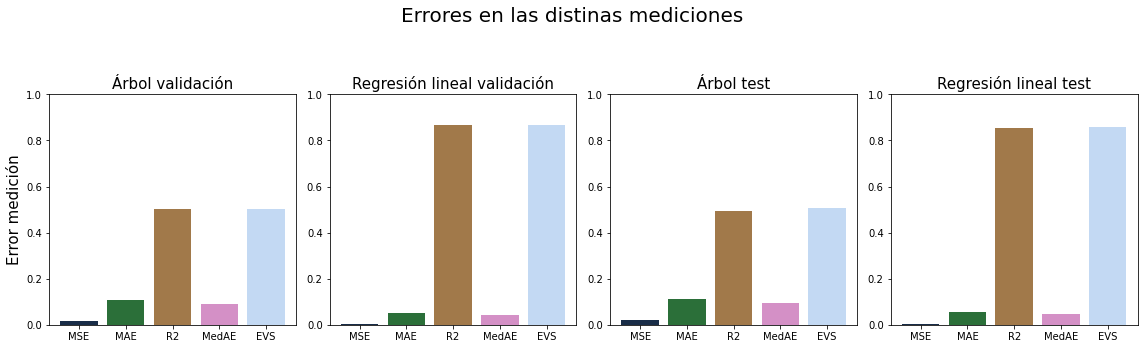

In [34]:
plt.figure()
metrics = ['MSE','MAE', 'R2', 'MedAE', 'EVS']
values = [DTR_val, LR_val, DTR_tst, LR_tst]
titles = ['Árbol validación','Regresión lineal validación','Árbol test','Regresión lineal test']

plt.suptitle('Errores en las distinas mediciones',size=20,y=1.2)
for i in range(4):
    plt.tight_layout()
    plt.subplot(1,4,i+1)
    plt.bar(metrics,values[i],color=cols)
    plt.tight_layout() # <- ayuda a ordenar ejes
    plt.title(titles[i],size=15)
    plt.ylim(0,1)
    if i == 0:
        plt.ylabel("Error medición",size=15)
plt.show()

La elección de métricas fue principalmente por las 3 más ocupadas, que son MAE, MSE y R2. Y además se escogió MedAE, porque es robusta con outliers y EVS debido a que funciona con la varianza.

Con respecto a los errores, se puede apreciar que MSE y MAE funcionan burn, entregando un error bajo en cada medición, esto debido a que funcionan con cada valor y no con un total de ellos. Lo mismo ocurre con MedAE, por lo que demuestra ser robusta con los outliers. Por otro lado R2 depende mucho de la varianza, por lo que otorga un mayor error, esto al igual que EVS.

Por otro lado, si comparamos los resultados para cada sistema, se aprecia claramente que los árboles obtienen un mayor error en general, comparado con las regresiones lineales. Lo que se puede deber a una mala configuración del árbol elegido.

iv) ¿Cómo se comportan los tiempos de entrenamiento de cada modelo? ¿Le parece justificado el tiempo adicional? 

Árboles de decisión se demora mucho más que la regresión lineal, como 7[min]  en collab contra los 70[ms]. Esto no es justificado, dado que otorga un mejor desempeño que la regresión lineal, aunque también puede deberse a una mala calibración del árbol.

#### 1.d _Stump_
Entrene ahora un _Stump_ o árbol de profundidad 1. ¿Cómo cambian los 5 errores en validación y test con respecto al árbol de la pregunta anterior? Discuta sobre el número de parámetros entrenables que tendrá cada modelo.

In [35]:
stump =  DecisionTreeRegressor(criterion='mae',
                            max_depth=1
                            )
%timeit -n 1 -r 1 stump.fit(x_tr,y_tr)

1 loop, best of 1: 4min 16s per loop


In [36]:
y_pred_stump_val = stump.predict(x_val)
y_pred_stump_tst = stump.predict(x_tst)

In [37]:
MSE_stump_val = mean_squared_error(y_val, y_pred_stump_val) #val
MAE_stump_val = mean_absolute_error(y_val, y_pred_stump_val) #val
R2_stump_val = r2_score(y_val, y_pred_stump_val) #val 
MedAE_stump_val = median_absolute_error(y_val, y_pred_stump_val) #val 
EVS_stump_val = explained_variance_score(y_val, y_pred_stump_val) #val 
stump_val = [MSE_stump_val,MAE_stump_val,R2_stump_val,MedAE_stump_val,EVS_stump_val]

In [38]:
MSE_stump_tst = mean_squared_error(y_tst, y_pred_stump_tst) #test 
MAE_stump_tst = mean_absolute_error(y_tst, y_pred_stump_tst) #test 
R2_stump_tst = r2_score(y_tst, y_pred_stump_tst) #test 
MedAE_stump_tst = median_absolute_error(y_tst, y_pred_stump_tst) #test 
EVS_stump_tst = explained_variance_score(y_tst, y_pred_stump_tst) #test 
stump_tst = [MSE_stump_tst,MAE_stump_tst,R2_stump_tst,MedAE_stump_tst,EVS_stump_tst]

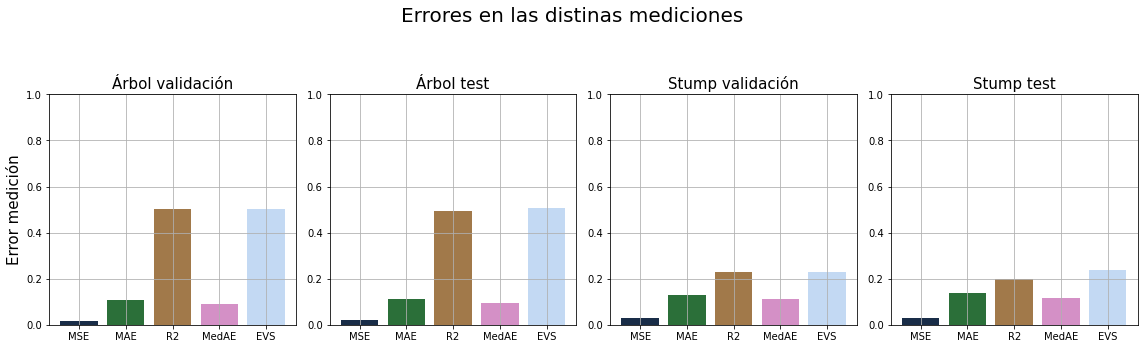

In [39]:
plt.figure()
metrics = ['MSE','MAE', 'R2', 'MedAE', 'EVS']
values = [DTR_val, DTR_tst, stump_val, stump_tst]
titles = ['Árbol validación','Árbol test','Stump validación','Stump test']

plt.suptitle('Errores en las distinas mediciones',size=20,y=1.2)
for i in range(4):
    plt.tight_layout()
    plt.subplot(1,4,i+1)
    plt.grid()
    plt.bar(metrics,values[i],color=cols)
    plt.title(titles[i],size=15)
    plt.ylim(0,1)
    if i == 0:
        plt.ylabel("Error medición",size=15)
plt.show()

Para el MSE, MAE y MedAE los errores nuevos se mantienen o aumentan levemente, mientras que R2 y EVS tienden a ser mucho menores que en el caso anterior, esto indica que existe un **empeoramiento** del rendimiento del árbol con poca profundidad.

#### 1.e Profundidad máxima
Explore distintos valores de la profundidad máxima del árbol. Para esto, realice K-fold sobre al menos 10 valores distintos de la profundidad del árbol y compare el promedio de los MAE de validación. También guarde los promedios de MAE de _train_ y grafique cómo estos varían a medida que varía la profundidad máxima. Idealmente debería considerar un rango entre profundidad máxima 1 y 30, con un mínimo de 10 evaluaciones. Este punto puede resultar en un largo tiempo de cómputo, podría ser recomendable correrlo en _Collab_ en caso de tener máquinas más lentas. 

Finalmente, entrene el árbol con profundidad óptima sobre todos los datos de entrenamiento y calcule los 5 errores escogidos previamente sobre validación y test. ¿Mejoramos el desempeño obtenido anteriormente con los árboles sin sintonizar? 

In [40]:
from sklearn.model_selection import KFold

In [70]:
x = np.arange(1,30,3)
x_total = pd.concat([x_tr, x_val],ignore_index=True)
y_total = pd.concat([y_tr,y_val],ignore_index=True)

In [42]:
x = np.arange(1,30,3)
x_total = pd.concat([x_tr, x_val])
y_total = pd.concat([y_tr,y_val])
n_split = 2
MAE_val = []
MAE_train = []
for prof in x:
  kf = KFold(n_splits=n_split)
  arbolito =  DecisionTreeRegressor(criterion='mae', max_depth=prof)
  mae_t = 0
  mae_v = 0
  for t,v in kf.split(x_total): 
    x_t, x_v = np.array(x_total)[t], np.array(x_total)[v]
    y_t, y_v = np.array(y_total)[t], np.array(y_total)[v]
    arbolito.fit(x_t,y_t)
    mae_t += mean_absolute_error(y_t, arbolito.predict(x_t)) #MAE de tr
    mae_v += mean_absolute_error(y_v, arbolito.predict(x_v)) #MAE de val
  MAE_train.append(mae_t/n_split)
  MAE_val.append(mae_v/n_split)

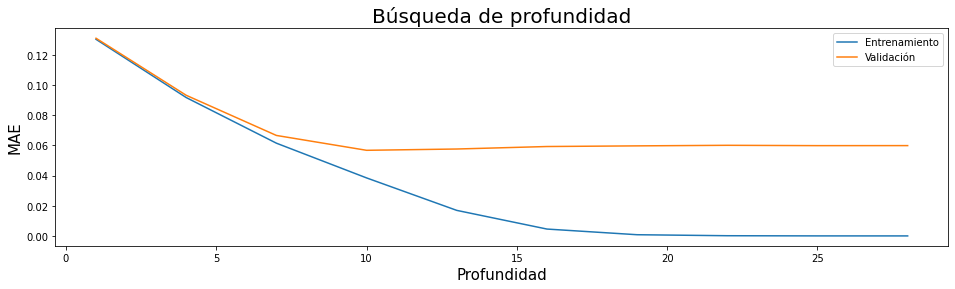

In [43]:
plt.plot(x, MAE_train, label='Entrenamiento')
plt.plot(x, MAE_val, label='Validación')
plt.ylabel('MAE',size=15)
plt.xlabel('Profundidad',size=15)
plt.title('Búsqueda de profundidad',size=20)
plt.ylim(0,1)
plt.legend()
plt.show()

En esta parte se eligieron valores 10 valores entre 1 y 30, separados cada 3 unidades. Donde se aprecia que sobre el valor 10 existe un claro sobreajuste del árbol, por lo que se utilizará el valor 7 cómo la profundidad óptima.

In [46]:
RealTree = DecisionTreeRegressor(criterion='mae', max_depth=7)
RealTree.fit(x_tr, y_tr)
y_pred_tst = RealTree.predict(x_tst)
y_pred_val = RealTree.predict(x_val)

In [48]:
MSE_tst   = mean_squared_error(y_tst, y_pred_tst) #tst 
MAE_tst   = mean_absolute_error(y_tst, y_pred_tst) #tst 
R2_tst    = r2_score(y_tst, y_pred_tst) #tst 
MedAE_tst = median_absolute_error(y_tst, y_pred_tst) #tst 
EVS_tst   = explained_variance_score(y_tst, y_pred_tst) #tst 
arbol_tst = [MSE_tst,MAE_tst,R2_tst,MedAE_tst,EVS_tst]

In [50]:
MSE_val   = mean_squared_error(y_val, y_pred_val) #val 
MAE_val   = mean_absolute_error(y_val, y_pred_val) #val 
R2_val    = r2_score(y_val, y_pred_val) #val 
MedAE_val = median_absolute_error(y_val, y_pred_val) #val 
EVS_val   = explained_variance_score(y_val, y_pred_val) #val 
arbol_val = [MSE_val,MAE_val,R2_val,MedAE_val,EVS_val]

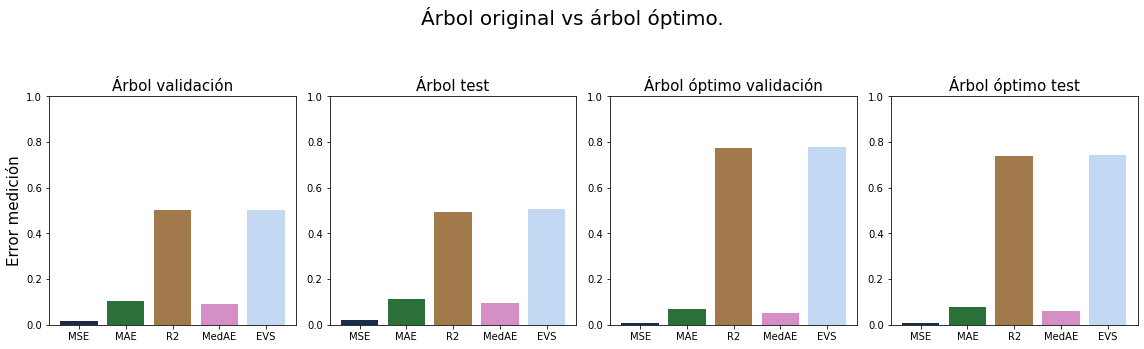

In [52]:
plt.figure()
metrics = ['MSE','MAE', 'R2', 'MedAE', 'EVS']
values = [DTR_val, DTR_tst, arbol_val, arbol_tst]
titles = ['Árbol validación','Árbol test','Árbol óptimo validación','Árbol óptimo test']

plt.suptitle('Árbol original vs árbol óptimo.',size=20,y=1.2)
for i in range(len(values)):
    plt.tight_layout()
    plt.subplot(1,len(values),i+1)
    plt.bar(metrics,values[i],color=cols)
    plt.tight_layout() # <- ayuda a ordenar ejes
    plt.title(titles[i],size=15)
    plt.ylim(0,1)
    if i == 0:
        plt.ylabel("Error medición",size=15)
plt.show()

Al comparar el resultado del primer árbol (mejor que el stump), es notoria la mejora de rendimiento, dado que MSE, MAE y MedAE decrementan su error y tanto R2 como EVS aumentan su aserción. Esto muestra la necesidad de sintonizar los árboles para poder elegir el mejor.

#### 1.f Random Forest

En la pregunta anterior vimos que una profundidad de árbol muy grande puede llevarnos a _overffiting_, pues la cantidad de "decisiones" que puede aprender el modelo aumentan significativamente y el modelo tenderá a aprender de memoria el conjunto de entrenamiento, perdiendo capacidad de generalización. Otra aproximación para evitar _overffiting_ es no utilizar todos los datos para entrenar, estrategia implementada por _Random Forest_. 

Discuta por qué el utilizar muchos modelos que no conocen todos los datos puede ayudar a mejorar la capacidad de generalización, evitando así que el modelo final esté sobreajustado. Entrene luego un _Random Forest Regressor_, con a lo menos 10 árboles. Discuta sobre qué elección realizar sobre la profundidad máxima de estos árboles. ¿Cómo se compara el desempeño de _Random Forest_ frente a un árbol por si solo? Ocupe las 5 métricas en el conjunto de validación y test para concluir.

La razón por la que los modelos que no conocen todos los datos mejoran la capacidad de generalización

In [53]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=10,
                               criterion='mae',
                               max_depth=5)

forest.fit(x_tr, y_tr)
y_pred_tst = forest.predict(x_tst)
y_pred_val = forest.predict(x_val)

In [54]:
MSE_tst   = mean_squared_error(y_tst, y_pred_tst) #tst 
MAE_tst   = mean_absolute_error(y_tst, y_pred_tst) #tst 
R2_tst    = r2_score(y_tst, y_pred_tst) #tst 
MedAE_tst = median_absolute_error(y_tst, y_pred_tst) #tst 
EVS_tst   = explained_variance_score(y_tst, y_pred_tst) #tst 
Forest_tst = [MSE_tst,MAE_tst,R2_tst,MedAE_tst,EVS_tst]

In [55]:
MSE_val   = mean_squared_error(y_val, y_pred_val) #val 
MAE_val   = mean_absolute_error(y_val, y_pred_val) #val 
R2_val    = r2_score(y_val, y_pred_val) #val 
MedAE_val = median_absolute_error(y_val, y_pred_val) #val 
EVS_val   = explained_variance_score(y_val, y_pred_val) #val 
Forest_val = [MSE_val,MAE_val,R2_val,MedAE_val,EVS_val]

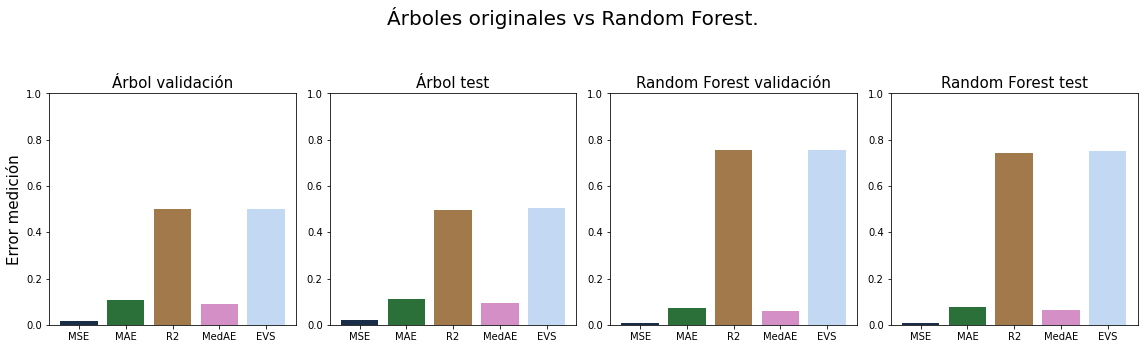

In [56]:
plt.figure()
metrics = ['MSE','MAE', 'R2', 'MedAE', 'EVS']
values = [DTR_val, DTR_tst, Forest_val, Forest_tst]
titles = ['Árbol validación','Árbol test','Random Forest validación','Random Forest test']

plt.suptitle('Árboles originales vs Random Forest.',size=20,y=1.2)
for i in range(len(values)):
    plt.tight_layout()
    plt.subplot(1,len(values),i+1)
    plt.bar(metrics,values[i],color=cols)
    plt.title(titles[i],size=15)
    plt.ylim(0,1)
    if i == 0:
        plt.ylabel("Error medición",size=15)
plt.show()

En esta ocación se comparan los resultados del random forest, con respecto al primer árbol. 

Al visualizar los errores del random forest, se aprecia que los errores de MSE, MAE y MedAE son menores que en el primer árbol, mientras que R2 y EVS incrementan su valor, esto indica la cantidad de semejanza entre la predicción y el modelo real, mejorando el desempeño del predictor respecto al árbol original.

#### 1.g Otros parámetros

Investigue un poco sobre los otros parámetros de los árboles y sus implicancias. Luego, entrene un árbol modificando algunos de sus parámetros según lo que estima que podría haber mejorado el desempeño. Discuta

In [61]:
tree = DecisionTreeRegressor(criterion='mae',
                            max_depth=7,  # Profundidad óptima
                            random_state=0,
                            min_samples_split=5, # Mínimo de muestras necesarias para dividir un nodo interno
                            min_samples_leaf=2, 
                            min_impurity_decrease=1e-8, # for instance
                            max_leaf_nodes=int(10000*0.6)) # for instance

tree.fit(x_tr, y_tr)
y_pred_val = tree.predict(x_val)

In [59]:
MSE_val   = mean_squared_error(y_val, y_pred_val) #val 
MAE_val   = mean_absolute_error(y_val, y_pred_val) #val 
R2_val    = r2_score(y_val, y_pred_val) #val 
MedAE_val = median_absolute_error(y_val, y_pred_val) #val 
EVS_val   = explained_variance_score(y_val, y_pred_val) #val 
tree_val = [MSE_val,MAE_val,R2_val,MedAE_val,EVS_val]

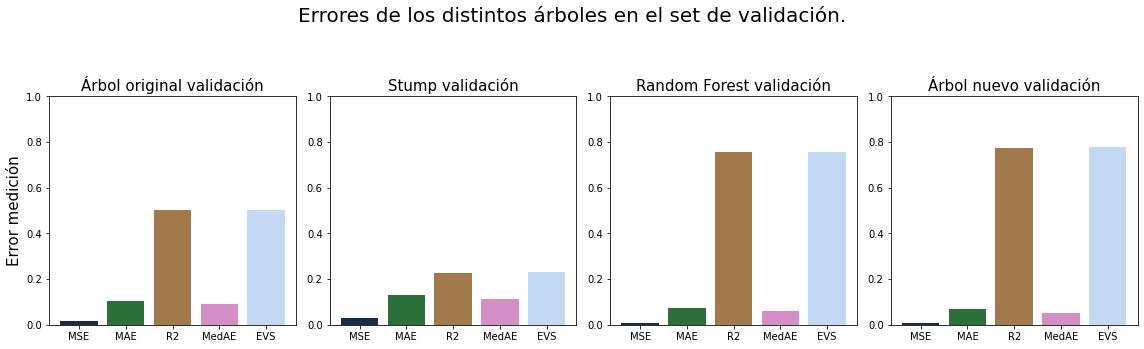

In [60]:
plt.figure()
metrics = ['MSE','MAE', 'R2', 'MedAE', 'EVS']
values = [DTR_val, stump_val, Forest_val, tree_val]
titles = ['Árbol original validación','Stump validación','Random Forest validación','Árbol nuevo validación']

plt.suptitle('Errores de los distintos árboles en el set de validación.',size=20,y=1.2)
for i in range(len(values)):
    plt.tight_layout()
    plt.subplot(1,len(values),i+1)
    plt.bar(metrics,values[i],color=cols)
    plt.title(titles[i],size=15)
    plt.ylim(0,1)
    if i == 0:
        plt.ylabel("Error medición",size=15)
plt.show()

Comparando todos los árboles que se han estudiado en esta sección, es posible notar como el árbol con la nueva configuración es ligeramente mejor que el anterior encontrado, conviertiéndose en el mejor de los árboles encontrados.

Para comprobar esto, se imprimirán los valores de los errores de estos últmos 2 árboles para poder comprobar como es ligeramente mejor.

In [72]:
print(metrics)
print(Forest_val)
print(tree_val)

['MSE', 'MAE', 'R2', 'MedAE', 'EVS']
[0.00880232403453162, 0.07241586160713669, 0.7550638893370879, 0.05862067229955916, 0.7560347232075166]
[0.008054288604373775, 0.06724852763772533, 0.7759321947175787, 0.05196071068012298, 0.7764134302217851]


#### 1.h Análisis de predicción para los distintos intervalos de tiempo

Quédese con el mejor modelo entrenado hasta el momento. Calcule el error MSE para cada una de las 24 horas que se están prediciendo con el conjunto de test. Grafique cómo varía el MSE para cada una de las 24 horas. Concluya.

In [63]:
error_per_hour=[]
for i in range(24):
    y_pred = tree.predict(x_tst)
    error_per_hour.append(mean_squared_error(np.array(y_tst)[:,i], np.array(y_pred)[:,i]))

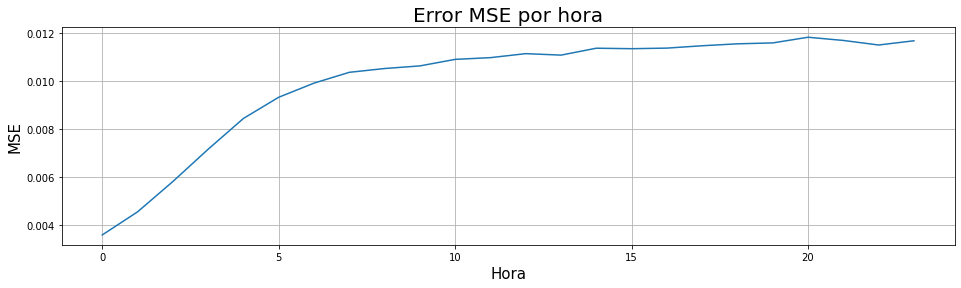

In [69]:
x = np.arange(24)
plt.plot(x, error_per_hour)
plt.ylabel('MSE',size=15)
plt.xlabel('Hora',size=15)
plt.title('Error MSE por hora',size=20)
plt.grid()
plt.show()

Al ver la evolución del registro horario, es posible notar como el error aumenta por hora, alcanzando una aparente estabilidad posterior a la hora 15. Aún así el error es mínimo, no superando el valor de 0,02.

# Clasificación con clases desbalanceadas

En las tareas de clasificación supervisada, buscamos que mediante los ejemplos etiquetados la máquina pueda aprender los atributos inherentes a las distintas clases. Sin embargo, en muchos casos reales de clasificación, la cantidad de ejemplos de cada clase son muy dispares, en cuyo caso hablamos de clases desbalanceadas. Si uno no aplica estrategias para compensar este problema, la máquina aprenderá muy bien las características de la clase más representada pero no logrará extraer información generalizable de la clase menos representada. Además, debemos tener cuidado al momento de interpretar las distintas métricas a las cuales tenemos acceso, pues debemos tomar en cuenta el balance de las clases y la naturaleza del problema para evaluar realmente qué tan bueno es el desempeño.

<img src="https://s-media-cache-ak0.pinimg.com/564x/cb/cb/41/cbcb41cb2c1db6c32c1e869be2172c3b.jpg"  style="width:8cm;"  />

Para esta parte de la tarea utilizaremos el siguiente dataset publicado en Kaggle: https://www.kaggle.com/zhangjuefei/birds-bones-and-living-habits/data#. Este conjunto de datos contiene 419 pájaros caracterizados con 10 atributos y clasificados según su grupo ecológico. Leer la página Kaggle del dataset para mayor información.

#### 2.a Carga de datos
i) Descargue los datos y cárguelos usando pandas, elimine los datos con valor NaN. Haga una exploración rápida de los datos, ¿cuántas clases hay?, ¿cómo se reparten?, ..., ¿Son las clases desbalanceadas efectivamente?

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import os
!kaggle datasets download zhangjuefei/birds-bones-and-living-habits -f bird.csv
os.rename("datasets_675_1284_bird.csv".replace('_','%2F'), "datasets_675_1284_bird.csv")

  0% 0.00/24.9k [00:00<?, ?B/s]
100% 24.9k/24.9k [00:00<00:00, 9.36MB/s]


Hay 6 clases y se reparten de la siguiente forma:



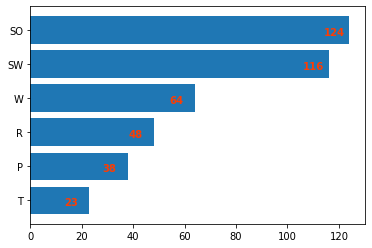

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df=pd.read_csv("datasets_675_1284_bird.csv").dropna()
df=df.drop(df.columns[0],axis=1)
print(f"Hay {len(set(df.type))} clases y se reparten de la siguiente forma:\n")
fig, ax = plt.subplots()
ax.barh(df.type.value_counts().index.tolist()[::-1], df.type.value_counts()[::-1])
for i, v in enumerate(df.type.value_counts()[::-1]):
    ax.text(v-10, i-0.15, str(v), color='#fc3d03', fontweight='bold') #fc3d03=casi rojo
plt.show()

Tomando en cuenta que 124 vs 23 es una gran diferencia, entonces si, se puede decir que las clases estan desbalanceadas.

In [ ]:
df.describe()

huml        humw       ulnal  ...        tibw        tarl        tarw
count  413.000000  413.000000  413.000000  ...  413.000000  413.000000  413.000000
mean    64.874867    4.381235   69.197409  ...    3.182324   39.309806    2.944891
std     54.056078    2.861460   58.929490  ...    2.084124   23.272704    2.194744
min      9.850000    1.140000   14.090000  ...    0.870000    7.770000    0.660000
25%     25.360000    2.200000   28.160000  ...    1.560000   23.050000    1.430000
50%     44.180000    3.500000   43.710000  ...    2.490000   31.740000    2.240000
75%     90.490000    5.820000   97.520000  ...    4.250000   50.440000    3.520000
max    420.000000   17.840000  422.000000  ...   11.030000  175.000000   14.090000

[8 rows x 10 columns]

Observando el promedio de cada clase, se notan las diferencias de escala de cada una, lo cual tiene sentido ya que son huesos de distintas partes del cuerpo. Sin embargo, es posible que estas clases se relacionen entre si.

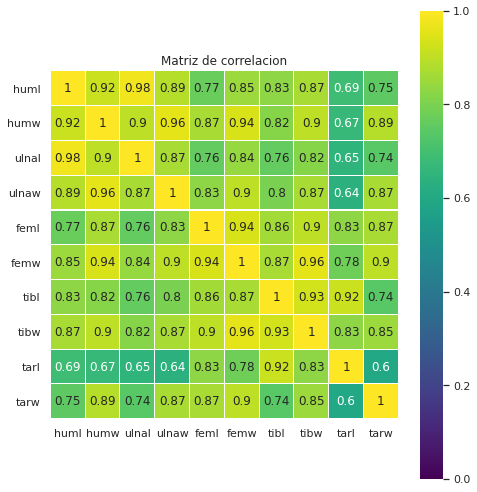

In [ ]:
plt.figure(figsize=(7,7))   # <- Otro modo de controlar el tamaño del plot dentro del Notebook
sns.heatmap(np.around(df.corr(),decimals=2), vmax=1,vmin=0, linewidths=0.1,
            square=True,annot=True,cmap='viridis',linecolor="white")
sns.set(font_scale=1)
plt.tight_layout()
plt.title('Matriz de correlacion');
plt.show()

Es extraño que el largo y el ancho del metatarso del pajaro no tengan tanta relación entre sí como lo tienen los otros huesos con sus respectivos largos y anchos. El largo del tarsometataso es el atributo que menos correlacion tiene con los huesos de las alas.

ii) Separe la data según su clase. Grafique los atributos para cada clase y compare.

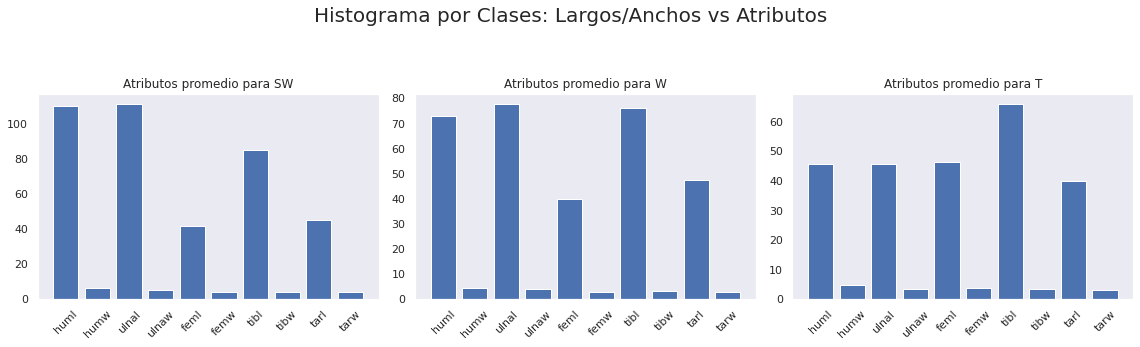

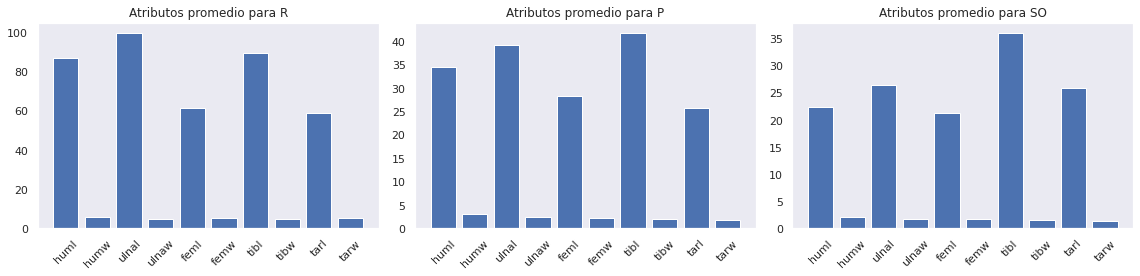

In [ ]:
plt.rcParams["figure.figsize"]=[16,4]
types=np.asarray(df.type.drop_duplicates())

k=1
plt.suptitle('Histograma por Clases: Largos/Anchos vs Atributos',size=20,y=1.2)
for i in types:
    # Atributos Clase
    XY=df.loc[(df.type==i),:]

    # Nombre Atributos
    X = df.columns.tolist()[:-1]

    # Promedio por atributo (para todos)
    Y = XY.drop(["type"],axis=1).mean(0)    
    plt.subplot(1,3,k)
    plt.title(f"Atributos promedio para {i}")    
    plt.bar(X,Y)    
    plt.xticks(rotation=45)    
    
    plt.tight_layout()
    plt.grid()
    if k==3:
        k=1
        plt.show()
    else:
        k+=1

Los largos se pueden comparar visiblemente, sin embargo la anchura no es posible comparala ya que la escala es bastante pequeña. Para hacer hacer una comparación visual de los atributos de anchura, a continuación se les aplica una transformación simple (Ancho*10).

In [ ]:
# Oprimir play para comprobar los numeros de SO (listo)
(pd.concat([df.loc[(df.type=="SO"),df.columns[:-1:2]], df.loc[(df.type==i),df.columns[1::2]].mul(10)], axis=1)[df.columns.tolist()[:-1]])

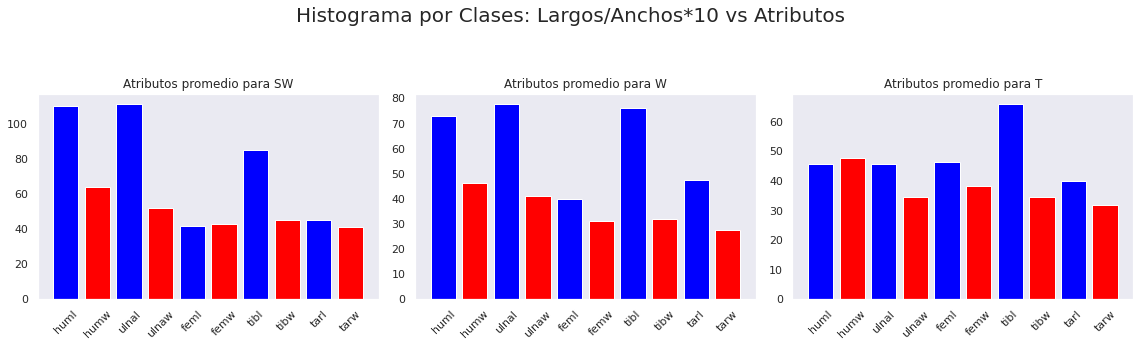

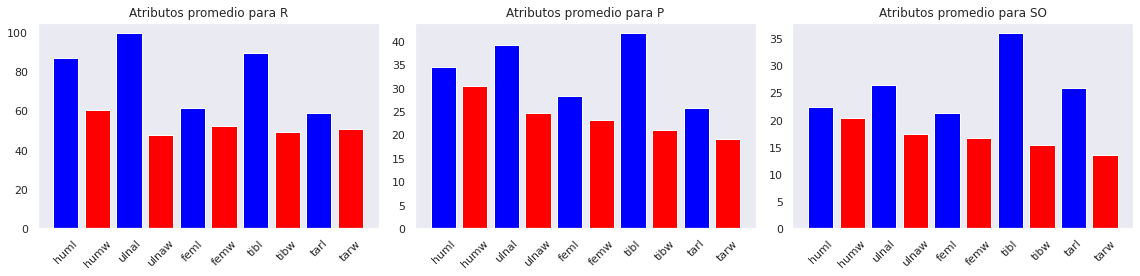

In [ ]:
plt.rcParams["figure.figsize"]=[16,4]
types=np.asarray(df.type.drop_duplicates())

k=1
plt.suptitle('Histograma por Clases: Largos/Anchos*10 vs Atributos',size=20,y=1.2)
for i in types:

    # Orden Atributos
    X = df.columns.tolist()[:-1]

    # Anchura por Clase
    XY=pd.concat([df.loc[(df.type==i),df.columns[:-1:2]], df.loc[(df.type==i),df.columns[1::2]].mul(10)], axis=1)[X]#<-Orden
    

    # Promedio por atributo (para todos)
    Y = XY.mean(0).values 

    plt.subplot(1,3,k)
    plt.title(f"Atributos promedio para {i}")    

    for j in range(len(X)):
        if j%2:
            # Largos
            plt.bar(X[j],Y[j], color='red')

        else:
            # Anchos
            plt.bar(X[j],Y[j], color='blue')
            plt.xticks(rotation=45)    
    
    plt.tight_layout()
    plt.grid()
    if k==3:
        k=1
        plt.show()
    else:
        k+=1

*Comparaciones*
* Los pajaros SW y los R tienen los huesos más grandes. El grosor de sus alas es muy parecido. Los pajaros R tiene tienen las patas más grandes que los SW. 
* En los pajaros T, P y SO el hueso Tibiotarso es el mas largo del conjunto de huesos, mientras que en los SW, W y R la Ulna es el más largo.

* El hueso más grueso en todos los pajaros es húmero. 
* En los pajaros SW, W, SO hueso más corto es el Fémur, mientras que en los pajaros R, P, T es el Tarsometatarso

#### 2.b Exploración y estandarización de datos

- Separe los atributos del target segun su clase como en el punto anterior.

- Separe luego los datos en Training set y Validation set_, con un 20% de los datos como validación y el resto como _train. Asegúrese que se mantienen las proporciones de ejemplos de cada clase en ambos sets.

- ¿Qué ocurriría si por ejemplo todos los ejemplos de la clase "R" quedaran en el _validation set_, qué haría cualquier máquina de aprendizaje?

- Estandarice los datos

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar X, Y
xs,ys=df.drop(["type"],axis=1),df["type"]

# Separar Training de Validation
x_tr, x_val, y_tr, y_val = train_test_split(xs, ys, test_size=0.2, random_state=0, stratify=ys)

# Estandarizar
scal = StandardScaler()
scal.fit(x_tr)
x_tr_st=scal.transform(x_tr)
x_val_st=scal.transform(x_val)

Si los ejemplos de la clase R se quedan en el validation set, entonces la máquina aprenderá a clasificar todas las clases excepto R, clasificandola como alguna otra.

#### 2.c Regresor logístico

Entrene un regresor logístico con los datos obtenidos de la pregunta anterior y calcule su desempeño (_score_ por ahora) sobre los datos de validación. A priori le parece un buen desempeño? 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import time

# Empieza el tiempo de ejecución
t_start = time.process_time()

# TRain
clf=LogisticRegression(random_state=0,multi_class="auto",solver="lbfgs",max_iter=5000).fit(x_tr_st, y_tr)

# Terina el tiempo de ejecución
t_stop = time.process_time()
    
# Tiempo total de ejecución
total = t_stop - t_start
print(f"Score={clf.score(x_val_st, y_val)}\n")
print(f"Tiempo de entrenamiento:{total}")

Score=0.6867469879518072

Tiempo de entrenamiento:0.03717801600000037


Me parece bien, ya que para algunas clases hay muy pocos ejemplos, por lo tanto era de esperar un alto porcentaje de error.

#### 2.d Matriz de confusión

Investigue un poco sobre los valores que conforman la matriz de confusión o _confusion matrix_. Comente sobre la significancia de los distintos valores para el problema en cuestión. 

Escriba una función que a partir de un modelo o de los valores predecidos por un modelo, grafique la matriz de confusión. 

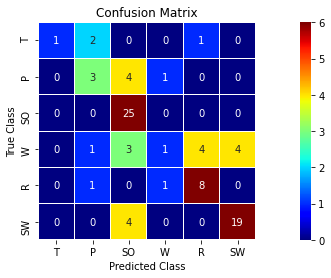

In [ ]:
# Puede usar libreria seaborn para realizar facilmente heatmaps anotados: 
from sklearn.metrics import confusion_matrix
bird = list(set(ys))
ax = plt.subplot()

# Se puede normalizar por los 'true' y poner vmax=1 y se va a ver casi igual, pero necesitaba contar
sns.heatmap(np.around(confusion_matrix(y_val, clf.predict(x_val_st), labels=bird), decimals=2), vmax=6,vmin=0, linewidths=0.1, xticklabels=bird, yticklabels=bird, square=True,annot=True,cmap='jet',linecolor="white", ax=ax);
ax.set_xlabel('Predicted Class');ax.set_ylabel('True Class'); 
ax.set_title('Confusion Matrix'); 

In [ ]:
print(classification_report(y_val, clf.predict(x_val_st)))

              precision    recall  f1-score   support

           P       0.43      0.38      0.40         8
           R       0.62      0.80      0.70        10
          SO       0.69      1.00      0.82        25
          SW       0.83      0.83      0.83        23
           T       1.00      0.25      0.40         4
           W       0.33      0.08      0.12        13

    accuracy                           0.69        83
   macro avg       0.65      0.55      0.54        83
weighted avg       0.65      0.69      0.64        83



Los valores principales que conforman la matriz de confusión son:
* Las ***columnas*** de la matriz corresponden a las ***prediciones*** del modelo, mientras que las **filas** corresponden a los valores **reales** del Validation Set.
* **Verdadero positivo**: cuando un dato es clasificado como perteneciente a su verdadera clase.
* **Falso positivo**: cuando un dato es clasificado en una clase distinta a la correspondiente.
* **Verdadero negativo**: cuando un dato no es clasificado en una clase no correspondiente.
* **Falso negativo**: cuando un dato no es clasificado en la clase correspondiente.

Para el caso multiclase esto se reduce a bien clasificado (Diagonal de la matriz) y mal clasificado (el resto de los elementos de la matriz). Aunque también se podría hacer una matriz de confución binaria por cada clase.

Metricas para analizar la matriz:
* Accuracy: Clases correctamente clasificadas del total de clases bien y mal clasificadas. 
  * El valor de esta métrica para este ejemplo no es muy bueno, posiblemente se debe a que las clases están desbalanceadas y el clasificador no aprende correctamente a clasificar las clases con menos ejemplos.
* Precision: el número de clases correctamente predichas del total de clases predichas. 
  * Era de esperar que las clases mejor balanceadas tendrían más chance de ser clasificadas correctamente, debido a la cantidad de ejemplos para aprender. Sorprendentemente la clase T fue predicha correctamente la única vez que se intento predecir.
* Recall: el número de clases correctamente predichas del total de clases reales.
  * El modelo se equivoca bastante en las clases con menos ejemplos. En promedio el recall es 0.55, es decir 45% de veces predice una clase que no es dada la cantidad de veces que si predice la correcta.
* F1-Score: Media armónica entre las do anteriores.
  * La media armónica de las 2 métricas anteriores es baja.

#### 2.e Arbol de Clasificación
Entrene un arbol de clasificación para tratar de resolver el problema. Pruebe unas cuantas profundidades máximas distintas y elija una. Si quiere puede modificar los otros hiperparámetros del modelo. 

Evalúe su desempeño respecto a los modelos lineales usando las métricas relevantes y compare su costo computacional. Discuta.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

depths = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

score_params = dict()
reports = list()

for d in depths:
        
    tree = DecisionTreeClassifier(criterion='gini', max_depth=d, random_state=0)

    #############################
    t_start = time.process_time()
    tree.fit(x_tr_st, y_tr)
    t_stop = time.process_time()
    #############################

    t_total = t_stop - t_start                 

    # Score        
    score_params["Score depth="+str(d)+": "] = tree.score(x_val_st, y_val)
       
    print(f"Tiempo medio para d={d}: {t_total}")

# Mejor modelo
max_score = max(score_params, key=score_params.get)
print("\n")
print(max_score, str(score_params[max_score]))   

Tiempo medio para d=3: 0.0033898939999996713
Tiempo medio para d=4: 0.003665527000000779
Tiempo medio para d=5: 0.0035219620000006557
Tiempo medio para d=6: 0.0033848990000002743
Tiempo medio para d=7: 0.003359959000000856
Tiempo medio para d=8: 0.0036043479999996464
Tiempo medio para d=9: 0.003224045999999703
Tiempo medio para d=10: 0.0035194789999994924
Tiempo medio para d=11: 0.0035986220000001623
Tiempo medio para d=12: 0.0035964229999994046
Tiempo medio para d=13: 0.003524591999999771


Score depth=10:  0.8313253012048193


              precision    recall  f1-score   support

           P       0.64      0.88      0.74         8
           R       0.83      1.00      0.91        10
          SO       0.92      0.92      0.92        25
          SW       0.91      0.87      0.89        23
           T       0.60      0.75      0.67         4
           W       0.75      0.46      0.57        13

    accuracy                           0.83        83
   macro avg       0.77      0.81      0.78        83
weighted avg       0.84      0.83      0.83        83



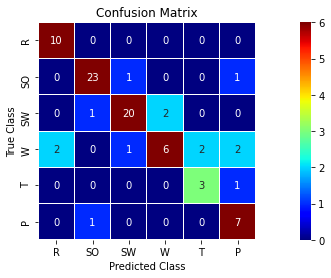

In [ ]:
# No ejecutar (reasignación de variable)
tree_all = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=0).fit(x_tr_st, y_tr)

bird = list(set(ys))
ax = plt.subplot()

# Se puede normalizar por los 'true' y poner vmax=1 y se va a ver casi igual, pero necesitaba contar
sns.heatmap(np.around(confusion_matrix(y_val, tree_all.predict(x_val_st), labels=bird), decimals=2), vmax=6,vmin=0, linewidths=0.1, xticklabels=bird, yticklabels=bird, square=True,annot=True,cmap='jet',linecolor="white", ax=ax);
ax.set_xlabel('Predicted Class');ax.set_ylabel('True Class'); 
ax.set_title('Confusion Matrix'); 
print(classification_report(y_val, tree_all.predict(x_val_st)))

El resultado mejoró un 20% en comparación con el regresor lineal, también los tiempos de cómputo según el la profundidad del árbol resultan ser en promedio aproximadamente 10 veces más rápido en árboles de clasificación.

#### 2.f _Undersampling_

Considerando que la gran mayoría del aprendizaje se realiza en los tipos "SO" y "SW", una aproximación para tratar de mejorar el desempeño de los modelos entrenados es simplemente reducir la cantidad de ejemplos de algunas clases para obtener nuevos conjuntos de datos con clases más balanceadas. Así, el aprendizaje se realiza de manera más balanceada entre todas las clases y se logran extraer mejor los atributos de cada clase. 

Complete la siguiente función capaz de hacer undersampling del conjunto de entrenamiento, se apreciarán versiones alternativas. Las validaciones deben realizarse sobre el conjunto de Validación original ¿Por qué?. Mantener el parámetro times que definirá el número de datos a borrar.

In [ ]:
def undersample(x_tr, y_tr, times = 10):
    indices = list()
    for i in range(times): #mantener!
        SW_index=y_tr.index[y_tr=="SW"]  # for instance
        SO_index=y_tr.index[y_tr=="SO"]  # for instance
        indices.append(np.random.choice(np.concatenate((SW_index,SO_index))))        
    x_tr = x_tr.drop(index=indices)    

    scal = StandardScaler()
    scal.fit(x_tr)
    x_tr_st=scal.transform(x_tr)
        
    return (x_tr_st, y_tr.drop(index=indices))

# Imprimir para comprobar (listo)
print(sum((undersample(x_tr, y_tr)[1]).value_counts()))
print(y_tr.shape)

320
(330,)


Las validaciones deben realizarse sobre el conjunto de Validación original, ya que este fué balanceado al principio del split, y mantenerlo fijo sirve para ver como se comporta el clasificador con lo aprendido en los distintos conjuntos de entrenamiento que genera la técnica de muestreo.

#### 2.i Entrenar con _Undersampling_

Pruebe distintos valores para el parámetro `times` y evalúe si hay diferencias significativas en la matriz de confusión para el mismo árbol de clasificación entrenado anteriormente. Evidentemente el número de ejemplos de entrenamiento cambia a medida cambia el parámetro `times`, sin embargo nuestro interés no es qué tan bien se comporta el modelo sobre los datos de entrenamiento si no sobre los de validación, los cuales deben ser constantes a lo largo del análisis.

¿Cómo se comparan estos modelos con el modelo con todos los datos? (recuerde que las comparaciones deben hacerse calculando el desempeño sobre el conjunto de validación completo con el modelo una vez entrenado) ¿Ve alguna ventaja en el uso de _undersampling_ frente al uso de todos los datos? 

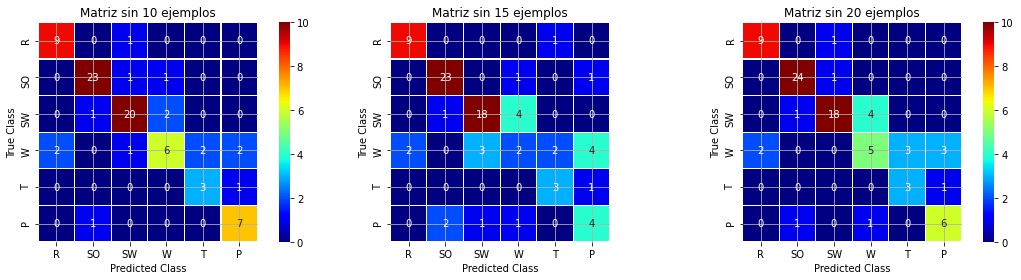

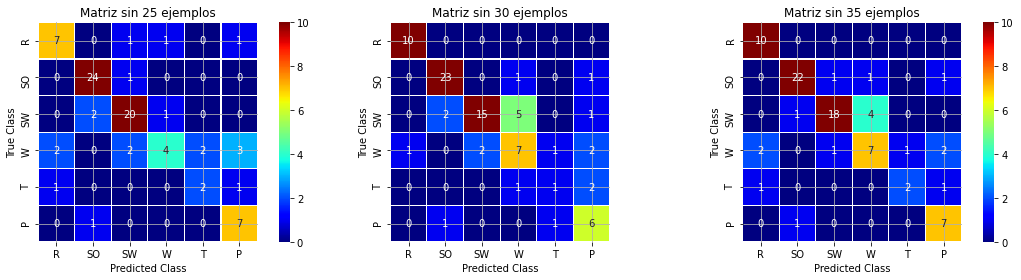

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
plt.rcParams["figure.figsize"]=[16,4]

times = [10, 15, 20, 25, 30, 35]

score_params = dict()
reportes = list()

k=1
for t in times:
                  
    tree = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=0)
    
    u_x_tr, u_y_tr = undersample(x_tr, y_tr, times = t)
    
    tree.fit(u_x_tr, u_y_tr)                               
       
    ax = plt.subplot(1,3,k)

    reportes.append(classification_report(y_val, tree.predict(x_val_st)))

    sns.heatmap(np.around(confusion_matrix(y_val, tree.predict(x_val_st), labels=bird), decimals=2), vmax=10,vmin=0, linewidths=0.1, xticklabels=bird, yticklabels=bird, square=True,annot=True,cmap='jet',linecolor="white", ax=ax);
    ax.set_xlabel('Predicted Class');ax.set_ylabel('True Class'); 
    ax.set_title(f'Matriz sin {t} ejemplos'); 

    plt.tight_layout()
    plt.grid()
    if k==3:
        k=1
        plt.show()
    else:
        k+=1

El undersampling con mayor cantidad de aciertos y el mejor F1-Score es sacando 10 ejemplos (accuracy 81%, F1-score=75%) 

In [ ]:
for r in range(len(reportes)):
    print(f"\n################# Sin {times[r]} ejemplos #################\n")
    print(reportes[r])
    print(f"###################################################")


################# Sin 10 ejemplos #################

              precision    recall  f1-score   support

           P       0.50      0.88      0.64         8
           R       0.83      1.00      0.91        10
          SO       0.92      0.88      0.90        25
          SW       0.95      0.87      0.91        23
           T       0.60      0.75      0.67         4
           W       0.71      0.38      0.50        13

    accuracy                           0.81        83
   macro avg       0.75      0.79      0.75        83
weighted avg       0.83      0.81      0.80        83

###################################################

################# Sin 15 ejemplos #################

              precision    recall  f1-score   support

           P       0.70      0.88      0.78         8
           R       0.82      0.90      0.86        10
          SO       0.92      0.92      0.92        25
          SW       0.86      0.78      0.82        23
           T       0.50   

En comparación con el modelo que usa todos los datos, sigue siendo un poco mejor usar todos los datos en términos de las metricas F1-Score y Score.

#### 2.j _Oversampling_

Otra aproximación para resolver el problema de las clases desbalanceadas es hacer _oversampling_. A partir de una muestra relativamente pequeña de ejemplos, en este caso de las clases distintas a "SW" y "SO", se busca crear un conjunto de datos más grande similar al inicial, que permita al modelo aprender las caracteristicas de esa clase, buscando nuevamente obtener clases más balanceadas que originalmente, pero esta vez sin reducir la cantidad de ejemplos. Esta aproximación tiene la ventaja que no reduce la cantidad de ejemplos pero trae la complicación de decidir cómo se van a crear los datos nuevos.

Dos aproximaciones bastante estandar son SMOTE y ADASYN. Investigue un poco que hace SMOTE y que diferencia implemente ADASYN. Por qué cree puede ser deseable buscar que los datos sintéticos no sean linealmente dependientes de los datos originales? 

Elija alguno de los dos métodos e impelementelo con el árbol entrenado previamente. Comente sobre el desempeño de tal modelo. 

SMOTE funciona seleccionando ejemplos que están cerca en el espacio de características, dibujando una línea entre los ejemplos en el espacio de características y dibujando una nueva muestra en un punto a lo largo de esa línea.

Específicamente, primero se elige un ejemplo al azar de la clase minoritaria. Luego se encuentran k de los vecinos más cercanos para ese ejemplo (típicamente k=5). Se elige un vecino seleccionado al azar y se crea un ejemplo sintético en un punto seleccionado al azar entre los dos ejemplos en el espacio de características.

ADASYN se basa en la idea de generar de forma adaptativa muestras de datos minoritarios según sus distribuciones: se generan más datos sintéticos para las muestras de clases minoritarias que son más difíciles de aprender en comparación con las muestras minoritarias que son más fáciles de aprender.

La idea clave del algoritmo ADASYN es utilizar una distribución de densidad como criterio para decidir automáticamente el número de muestras sintéticas que deben ser generadas para cada ejemplo de datos minoritarios.

¿Por qué cree puede ser deseable buscar que los datos sintéticos no sean linealmente dependientes de los datos originales?

Porque en tal caso no estaríamos aportando información adicional al modelo.

In [ ]:
!pip install  imbalanced-learn

In [ ]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


# GridSearch
k_values = [1, 2, 3, 4, 5, 6, 7]

for k in k_values:
    # define pipeline
    model = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=1)
    over = SMOTE(sampling_strategy='not majority', k_neighbors=k)     
    steps = [('over', over), ('model', model)]    
    pipeline = Pipeline(steps=steps)            
    # evaluate pipeline
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)            
    res = cross_validate(pipeline, x_tr_st, y_tr, scoring=['f1_macro', 'accuracy'], cv=cv)
    scores_f1, scores_acc, res_times = res['test_f1_macro'], res['test_accuracy'], res['score_time']
    score_f1, score_acc, res_time = np.around(mean(scores_f1), 3), np.around(mean(scores_acc), 3), np.around(mean(res_times), 4)
    print(f'> Tiempo promedio={res_time}, k={k}, F1-SCORE={score_f1}, Accuracy={score_acc}')

> Tiempo promedio=0.0015, k=1, F1-SCORE=0.706, Accuracy=0.748
> Tiempo promedio=0.0015, k=2, F1-SCORE=0.727, Accuracy=0.772
> Tiempo promedio=0.0015, k=3, F1-SCORE=0.701, Accuracy=0.743
> Tiempo promedio=0.0015, k=4, F1-SCORE=0.718, Accuracy=0.762
> Tiempo promedio=0.0015, k=5, F1-SCORE=0.702, Accuracy=0.749
> Tiempo promedio=0.0015, k=6, F1-SCORE=0.688, Accuracy=0.743
> Tiempo promedio=0.0016, k=7, F1-SCORE=0.72, Accuracy=0.76


Note que tanto SMOTE como ADASYN tienen muchos parámetros que podrían afectar la calidad de los datos generados. Se valorará un pequeño comentario sobre los parámetros de los métodos y qué representan en la heuristica utilizada. 

Se elige el SMOTE porque el ADASYN es muy sensible a los outliers, como se describió anteriormente, se concentra mucho en los puntos de baja densidad. La estrategia que se recomienda en el paper del creador del SMOTE es hacer oversampling a las clases minoritarias, en este caso se eligen todas menos SO y SW. El mejor da con 2 k_neighbors.

In [ ]:
X_tr_st, Y_tr = SMOTE(sampling_strategy='not majority', k_neighbors=2).fit_resample(x_tr_st, y_tr)

#### 2.k Redes neuronales _Feed Forward_ 

Por útimo, probaremos utilizar una red neuronal densa sobre los datos aumentados. Las Redes Neuronales son una herramienta muy poderosa pero comparativamente costosa frente a otros modelos. Entrenar una red neuronal puede resultar muy costos computacionalmente, por su gran numero de parámetros entrenables y por el caracter iterativo de su entrenamiento. Además, el gran numero de parámetros hace que las redes neuronales sean particularmente sensibles al _overfitting_, por lo cual suele ser necesario tener grandes cantidades de datos para poder entrenar una red neuronal obteniendo desempeños que justifiquen su costo adicional.

Por esto, entrenaremos la red neuronal sobre los datos aumentados. Básese en el código siguiente para crea la red neuronal. Explique los parámetros que se pasan en cada etapa de su creación, para esto puede leer la documentación de keras. Finalmente, entrene "completamente" la red, es decir hasta que se estanque el error de validación o comience a aumentar. ¿Cómo se compara la red frente a otros modelos, tanto en desempeño como en costo? 

In [ ]:
list(set(Y_tr))

['R', 'SO', 'SW', 'W', 'T', 'P']

In [ ]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

Y_tr_ = np.asarray(list(Y_tr))
label_encoder = LabelEncoder()
Y_tr_ = label_encoder.fit_transform(Y_tr_)
y_val_ = label_encoder.transform(y_val)
Y_tr_ohv = to_categorical(Y_tr_, num_classes=6)
Y_val_ohv = to_categorical(y_val_, num_classes=6)

In [ ]:
print(X_tr_st.shape, Y_tr_ohv.shape, x_val_st.shape, Y_val_ohv.shape)
print(pd.Index(Y_tr).value_counts())

(594, 10) (594, 6) (83, 10) (83, 6)
T     99
P     99
W     99
SW    99
SO    99
R     99
dtype: int64


Ahora esta balanceado igual que el mejor resultado de arriba.

In [ ]:
from keras.layers import Dense, Input
from keras.models import Model
import time

input = Input(shape=(X_tr_st.shape[1],))

dense = Dense(256,activation='relu')(input)
dense2 = Dense(1, activation='sigmoid')(dense)
output = Dense(6, activation='sigmoid')(dense2)

model = Model(inputs=[input], outputs=[output])
model.compile(optimizer='sgd',
             loss='binary_crossentropy',
             metrics=['accuracy'])
t_start = time.process_time()
history = model.fit(X_tr_st,Y_tr_ohv, epochs=180, verbose=0, validation_data=(x_val_st,Y_val_ohv))
t_stop = time.process_time()
print((t_stop-t_start)/9.0)
# note that history.history gives you the values of tr and val errors and accuracies

0.9713149204444436


In [ ]:
print(history.history['val_accuracy'][-1])

0.3012048304080963


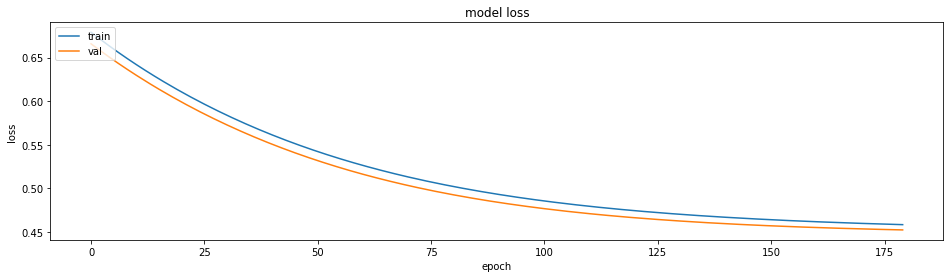

In [ ]:
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

El tiempo que demora en ejecutar el algoritmo es casi 1000 veces mas que con el modelo anterior, y al parecer el rendimiento no es muy bueno, lo anterior se debe a que un underfitting, ya que el train error y el val error son casi iguales, pero están lejos de ser 0.

<a id="tercero"></a>
## 3. Clasificación en texto

Un problema muy complejo, en el cual actualmente se esta avanzando a pasos de gigantes en comparación con los avances de hace unos cuantos años, es en la comprehensión de texto, o de lenguaje natural en general. Nuestra manera de construir significado a partir de las palabras es mucho más compleja de lo que nos damos cuenta y supone un gran grado de conocimiento previo que hemos adquirido a lo largo de nuestras vidas. Lograr que una maquina de aprendizaje pueda extraer significado o interpretaciones a partir de un texto es un problema bastante actual, en el cual aún se hacen avances día a día. En esta pregunta utilizaremos una base de datos de texto, extraida de _reviews_ de peliculas en la página IMDB. Cada uno de estos _reviews_ esta etiquetado como positivo o negativo. Nuestra tarea será predecir esta etiqueta a partir de la secuencia de palabras encodeadas como frecuencias de cada ejemplo.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6a/New-imdb-logo.png/1024px-New-imdb-logo.png"  style="height:6cm;"  />

Para esto probaremos distintas técnicas, incluyendo Perceptron, Redes densas _feed forward_ y ensamblados. Si bien ninguna de estas aproximaciones son las usualmente utilizadas en la actualidad para procesamiento de texto (_words embeddings_, redes recurrentes y redes convolucionales, entre muchos otros), esta pregunta servirá como una buena aproximación a las problematicas usualmente encontradas en estas técnicas y al momento de trabajar con texto. 


#### 3.a Carga de datos y preprocesamientos

Cargue los datos. Utilizaremos 45000 de los datos como entrenamiento y el resto como validación. Investigue sobre la base de datos en cuestión y la representación de los datos cargados: ¿qué representa cada entrada de `x_tr`?

Comente ligeramente sobre los parámetros `num_words` y `skip_top`. ¿Por qué podría ser deseable eliminar las palabras más comunes?

Utilize luego la función `vectorize_sequences` para transformar los inputs del modelo. ¿Qué realiza esta función? ¿Qué valor debería tener el parámetro `dimension` en este caso?  ¿Qué información perdemos y qué información preservamos en esta transformación?

Internet Movie Database es una base de datos en línea que almacena información relacionada con películas, personal de equipo de producción (incluyendo directores y productores), actores, series de televisión, programas de televisión, videojuegos, actores de doblaje y, más recientemente, personajes ficticios que aparecen en los medios de entretenimiento visual. La entrada x_tr es la opinión de una persona tema cinematográfico, y la salida es: si es positiva o negativa dicha opinión. 

* `num_words`: Las palabras se clasifican según la frecuencia con la que ocurren (en el conjunto de entrenamiento) y sólo se conservan las `num_words` más frecuentes. Cualquier palabra menos frecuente aparecerá como valor `oov_char` en los datos de la secuencia.

* `skip_top`: Se omiten las N palabras más frecuentes (que pueden no ser informativas). Estas palabras aparecerán como valor oov_char en el conjunto de datos.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

num_words = 500
(x_tr_, y_tr_), (x_val_, y_val_) = imdb.load_data(num_words=num_words, skip_top=5)

In [13]:
print(x_tr_[0])

[2, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 2, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 2, 172, 112, 167, 2, 336, 385, 39, 2, 172, 2, 2, 17, 2, 38, 13, 447, 2, 192, 50, 16, 6, 147, 2, 19, 14, 22, 2, 2, 2, 469, 2, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 2, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 2, 2, 2, 16, 480, 66, 2, 33, 2, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 2, 107, 117, 2, 15, 256, 2, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 2, 2, 2, 13, 104, 88, 2, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 2, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 2, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


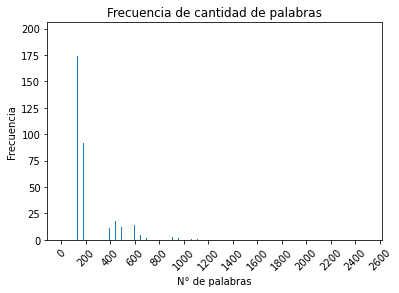

In [10]:
import matplotlib.ticker as plticker

fig, ax = plt.subplots()
plt.hist(list(map(lambda x: len(x), x_tr_)), bins=len(x_tr_))
plt.title('Frecuencia de cantidad de palabras')
plt.ylabel('Frecuencia')
plt.xlabel('N° de palabras')
loc = plticker.MultipleLocator(base=200) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.xticks(rotation=45)
plt.show();


In [18]:
def vectorize_sequences(sequences, dimension=500):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

Lo que hace esta función es convertir una entrada `word_id` en un vector de 0s y 1s dependiendo si una palabra del vocabulario aparece en la opinión. El valor de dimension debería ser 500 (num_words), ya que ese fue el tamaño del volabulario escogido al principio. Lo que se gana es que, como ya se estableció, las palabras más frecuentes podrían no aportar información adicional al modelo, a demás reducimos la dimensión de las features. 

In [7]:
import pandas as pd
print(pd.Index(y_tr_).value_counts())
print(pd.Index(y_val_).value_counts())

1    12500
0    12500
dtype: int64
1    12500
0    12500
dtype: int64


Las clases de los conjuntos de entrenamiento y validación están perfectamente valanceados.

In [24]:
x_tr = vectorize_sequences(x_tr_)
x_val = vectorize_sequences(x_val_)

In [23]:
print(f'{x_tr[0]} \n\n {x_tr.shape}')

[0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

#### 3.b Perceptrón **(Opcional)**
Entrene un perceptrón con activación sigmoidea, optimizador _Stochastic Gradient Descent_, por a lo menos 15 _epochs_, como muestra el código siguiente. 

Discuta sobre la dimensión de `x_tr` y la cantidad de parámetros del modelo deacuerdo al método `.summary` del modelo. 

Grafique el error o el _accuracy_ segun su preferencia, tanto sobre entrenamiento como validación, a medida pasan los _epochs_. Note esta información puede obtenerla desde `history.history`.

In [27]:
from keras.models import Sequential
from keras.layers import Dense
per = Sequential()
per.add(Dense(1,activation='sigmoid'))
per.compile('sgd',loss='binary_crossentropy',metrics=['accuracy'])
history = per.fit(x_tr,y_tr, epochs=15, validation_data=(x_val,y_val))
per.summary()

Epoch 1/15
782/782 [==============================] - 1s 2ms/step - loss: 0.6111 - accuracy: 0.6713 - val_loss: 0.5455 - val_accuracy: 0.7522
Epoch 2/15
782/782 [==============================] - 1s 2ms/step - loss: 0.5115 - accuracy: 0.7760 - val_loss: 0.4891 - val_accuracy: 0.7864
Epoch 3/15
782/782 [==============================] - 1s 2ms/step - loss: 0.4691 - accuracy: 0.8003 - val_loss: 0.4597 - val_accuracy: 0.8010
Epoch 4/15
782/782 [==============================] - 1s 2ms/step - loss: 0.4453 - accuracy: 0.8098 - val_loss: 0.4424 - val_accuracy: 0.8072
Epoch 5/15
782/782 [==============================] - 1s 2ms/step - loss: 0.4298 - accuracy: 0.8155 - val_loss: 0.4295 - val_accuracy: 0.8126
Epoch 6/15
782/782 [==============================] - 1s 2ms/step - loss: 0.4188 - accuracy: 0.8210 - val_loss: 0.4211 - val_accuracy: 0.8160
Epoch 7/15
782/782 [==============================] - 1s 2ms/step - loss: 0.4106 - accuracy: 0.8253 - val_loss: 0.4144 - val_accuracy: 0.8194
Epoch 

La cantidad de parámetros es 501 porque estamos agregando el intercepto a la red

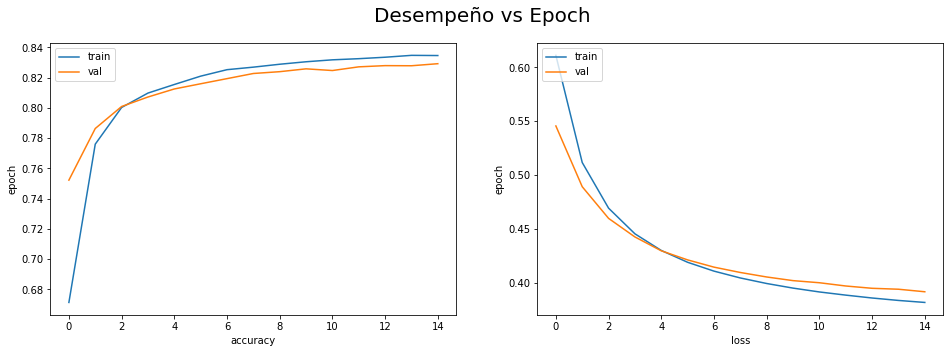

In [51]:

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16,5)
fig.suptitle("Desempeño vs Epoch", fontsize=20)
# Accuracy
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_xlabel('accuracy')
ax1.set_ylabel('epoch')
ax1.legend(['train', 'val'], loc='upper left')

# Loss
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_xlabel('loss')
ax2.set_ylabel('epoch')
ax2.legend(['train', 'val'], loc='upper left')
plt.show();

#### 3.c Red con una capa oculta
Ahora, haremos nuevamente un modelo secuencial, al cual le agregarémos una capa oculta con activación ReLu. ¿Qué realiza la función ReLu (puede ejemplificar con gráficos)?

Entrene esta red nuevamente con los mismos parámetros que la red anterior. ¿Mejoran los desempeños? ¿Cuál es el número de parámetros de este modelo? Grafíque nuevamente como varía la métrica a medida pasan las _epochs_. ¿Alcanza a notar sobreajuste?

Cambie la función de activación por otra de su elección (e.g. $tanh$ o activación lineal). ¿Cambia el desempeño? 

Compare finalmente el desempeño con una regresión lineal. ¿Cómo hace la red para obtener representaciones no-lineales que la regresión lineal no puede obtener? ¿Por qué se podría argumentar que una red neuronal densa _feed forward_ tiene un sabor a ensamblado de regresiones lineales en un principio? 

In [58]:
from keras.models import Model
from keras.layers import Input, Dense

input = Input(shape=(500, ), dtype='int32')

# Aplicando una capa densa en la suma
dense = Dense(64, activation='relu')(input)

output = Dense(1, activation='sigmoid')(dense)

# Construyendo el modelo
model = Model(inputs=[input], outputs=[output])
model.compile(loss='categorical_crossentropy', optimizer='sgd',
             metrics=['accuracy'])

# Entrenando el modelo
history = model.fit(x_tr,y_tr, epochs=15, validation_data=(x_val,y_val))
model.summary()

Epoch 1/15
782/782 [==============================] - 2s 2ms/step - loss: 5.9605e-08 - accuracy: 0.5053 - val_loss: 5.9605e-08 - val_accuracy: 0.5094
Epoch 2/15
782/782 [==============================] - 2s 2ms/step - loss: 5.9605e-08 - accuracy: 0.5053 - val_loss: 5.9605e-08 - val_accuracy: 0.5094
Epoch 3/15
782/782 [==============================] - 2s 2ms/step - loss: 5.9605e-08 - accuracy: 0.5053 - val_loss: 5.9605e-08 - val_accuracy: 0.5094
Epoch 4/15
782/782 [==============================] - 2s 2ms/step - loss: 5.9605e-08 - accuracy: 0.5053 - val_loss: 5.9605e-08 - val_accuracy: 0.5094
Epoch 5/15
782/782 [==============================] - 2s 2ms/step - loss: 5.9605e-08 - accuracy: 0.5053 - val_loss: 5.9605e-08 - val_accuracy: 0.5094
Epoch 6/15
782/782 [==============================] - 2s 2ms/step - loss: 5.9605e-08 - accuracy: 0.5053 - val_loss: 5.9605e-08 - val_accuracy: 0.5094
Epoch 7/15
782/782 [==============================] - 2s 2ms/step - loss: 5.9605e-08 - accuracy: 0.5

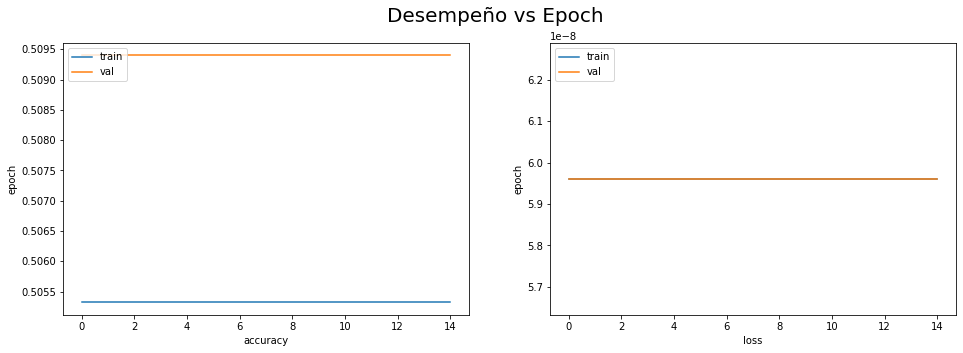

In [59]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16,5)
fig.suptitle("Desempeño vs Epoch", fontsize=20)
# Accuracy
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_xlabel('accuracy')
ax1.set_ylabel('epoch')
ax1.legend(['train', 'val'], loc='upper left')

# Loss
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_xlabel('loss')
ax2.set_ylabel('epoch')
ax2.legend(['train', 'val'], loc='upper left')
plt.show();

* ¿Mejoran los desempeños? Si y no, baja el error de validación, pero disminuye el Accuracy 
* ¿Cuál es el número de parámetros de este modelo? 32,129 = (500+1)*64 + (64 + 1)
* ¿Alcanza a notar sobreajuste? Por alguna razón se puede apreciar el sobreajuste en el gráfico de Accuracy, pero no en el de Loss.

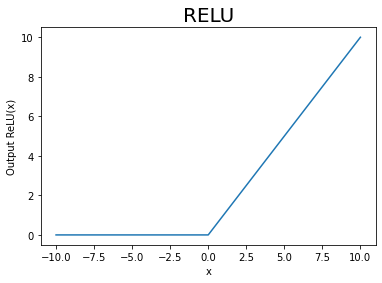

In [64]:
# ReLU
def rectified(x):
	return max(0.0, x)
 
# define a series of inputs
series_in = [x for x in range(-10, 11)]
# calculate outputs for our inputs
series_out = [rectified(x) for x in series_in]
# line plot of raw inputs to rectified outputs
plt.plot(series_in, series_out)
plt.title('RELU', fontdict={'size': 20})
plt.xlabel('x')
plt.ylabel('Output ReLU(x)')
plt.show()

Lo que hace ReLU es resolver el problema del desvanecimiento del gradiente a través del encedido y apagado de neuronas, actuando como función de activación lineal en el encendido, y como penalización total en el apagado.

In [65]:
input = Input(shape=(500, ), dtype='int32')

# Aplicando una capa densa en la suma
dense = Dense(64, activation='tanh')(input)

output = Dense(1, activation='sigmoid')(dense)

# Construyendo el modelo
model = Model(inputs=[input], outputs=[output])
model.compile(loss='categorical_crossentropy', optimizer='sgd',
             metrics=['accuracy'])

# Entrenando el modelo
history = model.fit(x_tr,y_tr, epochs=15, validation_data=(x_val,y_val))
model.summary()

Epoch 1/15
782/782 [==============================] - 2s 3ms/step - loss: 5.9605e-08 - accuracy: 0.5273 - val_loss: 5.9605e-08 - val_accuracy: 0.5256
Epoch 2/15
782/782 [==============================] - 2s 3ms/step - loss: 5.9605e-08 - accuracy: 0.5273 - val_loss: 5.9605e-08 - val_accuracy: 0.5256
Epoch 3/15
782/782 [==============================] - 2s 3ms/step - loss: 5.9605e-08 - accuracy: 0.5273 - val_loss: 5.9605e-08 - val_accuracy: 0.5256
Epoch 4/15
782/782 [==============================] - 2s 2ms/step - loss: 5.9605e-08 - accuracy: 0.5273 - val_loss: 5.9605e-08 - val_accuracy: 0.5256
Epoch 5/15
782/782 [==============================] - 2s 2ms/step - loss: 5.9605e-08 - accuracy: 0.5273 - val_loss: 5.9605e-08 - val_accuracy: 0.5256
Epoch 6/15
782/782 [==============================] - 2s 2ms/step - loss: 5.9605e-08 - accuracy: 0.5273 - val_loss: 5.9605e-08 - val_accuracy: 0.5256
Epoch 7/15
782/782 [==============================] - 2s 2ms/step - loss: 5.9605e-08 - accuracy: 0.5

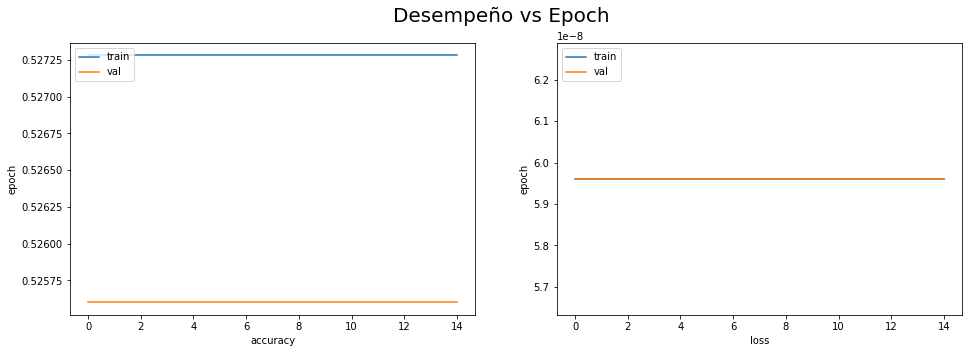

In [66]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16,5)
fig.suptitle("Desempeño vs Epoch", fontsize=20)
# Accuracy
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_xlabel('accuracy')
ax1.set_ylabel('epoch')
ax1.legend(['train', 'val'], loc='upper left')

# Loss
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_xlabel('loss')
ax2.set_ylabel('epoch')
ax2.legend(['train', 'val'], loc='upper left')
plt.show();

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  classification_report
lr = LinearRegression().fit(x_tr, y_tr)
print(lr.score(x_val, y_val))

0.452450332326889


* ¿Cómo hace la red para obtener representaciones no-lineales que la regresión lineal no puede obtener? A través de las funciones de activación, que le aplican una no-linealidad a las salidas de las neuronas.

* ¿Por qué se podría argumentar que una red neuronal densa feed forward tiene un sabor a ensamblado de regresiones lineales en un principio? En un principio, si no se aplicara la no-linealidad a las salidas de las neuronas, se estaría simplemente ensamblando una combinación lineal de regresiónes lineales, lo cual sería equivalente a ener una sola regresión lineal.

#### 3.d Exploración de número de neuronas ocultas

Utilizando la misma estructura de la red entrenada en la pregunta anterior, evalue como varía el _accuracy_ sobre validación y entrenamiento a medida se cambia el numero de neuronas. Explore numeros de neuronas en potencias de 2 entre 2 y 256. En cada iteración debe considerar el mejor _accuracy_ sobre validación y el _accuracy_ de entrenamiento de ese mísmo _epoch_, pues ese sería el modelo que se preferiría. 

Grafique como variaron los _accuracy_ a medida cambió el número de neuronas y discuta. 

In [71]:
tr_acc = list()
val_acc = list()
for i in range(1,9):
    # do model
    input = Input(shape=(500, ), dtype='int32')

    # Aplicando una capa densa en la suma
    dense = Dense(2**i, activation='relu')(input)

    output = Dense(1, activation='sigmoid')(dense)

    # Construyendo el modelo
    model = Model(inputs=[input], outputs=[output])
    model.compile(loss='categorical_crossentropy', optimizer='sgd',
                metrics=['accuracy'])

    # Entrenando el modelo
    history = model.fit(x_tr,y_tr, epochs=15, verbose=0, validation_data=(x_val,y_val))    

    tr_acc.append(max(history.history['accuracy']))    
    val_acc.append(max(history.history['val_accuracy']))

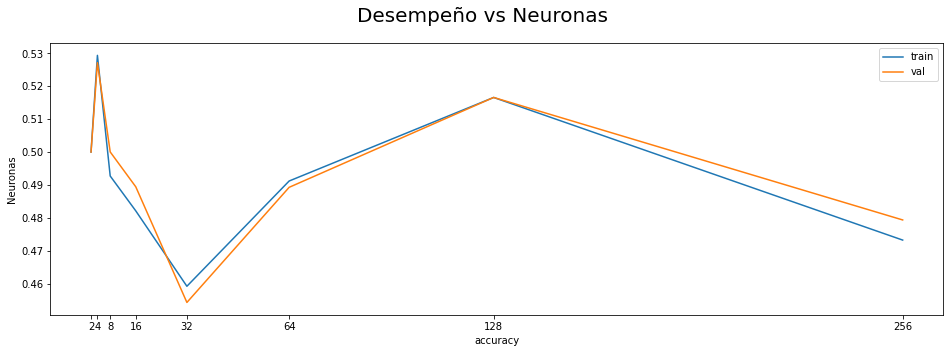

In [93]:
neu = [2**i for i in range(1, 9)]
fig, ax = plt.subplots()
fig.set_size_inches(16,5)
fig.suptitle("Desempeño vs Neuronas", fontsize=20)
# Accuracy
ax.plot(neu, tr_acc)
ax.plot(neu, val_acc)
ax.set_xlabel('accuracy')
ax.set_ylabel('Neuronas')
ax.legend(['train', 'val'], loc='upper right')
plt.xticks(neu)
plt.show();

Se observa que el mejor accuracy ocurre cuando el número de neuronas es 4 y luego comienza a bajar, sin embargo el accuracy con 128 neuronas es mejor que con 2 neuronas.

#### 3.e Pesos de la red

Obtenga los pesos de la red entrenada a completitud anteriormente usando el método `.get_weights` y grafíque un historgrama. Note que para cada capa se obtienen por separado los pesos de los datos y del intercepto. Así en el índice 0 obtenemos los pesos de los datos de entrada, en el 1 los pesos del intercepto de entrada, en el 2 los pesos de la capa oculta y en el 3 los pesos del intercepto de la capa oculta. Solo se requiere graficar el primero.

Compare luego ese histograma con el obtenido al graficar los pesos de una red sin entrenar, como muestra el código. Discuta lo que observa. 

782/782 [==============================] - 1s 1ms/step - loss: 0.6914 - accuracy: 0.5389


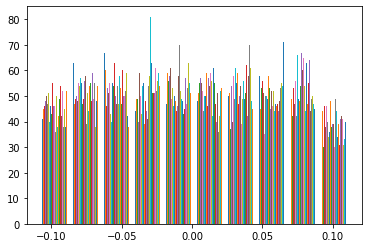

In [102]:
from keras.optimizers import SGD

untrained = Sequential()
untrained.add(Dense(32, activation='relu'))
untrained.add(Dense(1,activation='sigmoid'))
untrained.compile(SGD(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])
untrained.fit(x_tr,y_tr,epochs=1)  # the easy way to create the weights without training, though there are more purists ways

plt.hist(untrained.get_weights()[0])
plt.show()

#### 3.f Extreme learning Machine **(Opcional)**
En esta pregunta implementaremos una _extreme learning machine_ o ELM. Este modelo puede asimilarse a una red neuronal como la entrenada anteriormente pero donde los pesos que conectan al _input_ y la capa oculta no son entrenables. Podemos realizar esto manualmente en algunos casos o utilizando igualmente keras como muestra el código. 
Entrene una ELM y compare los tiempos de entrenamiento y desempeños obtenidos para redes con el mismo número de neuronas. Compare tambien el número de parámetros entrenables respecto redes densas del mismo tamaño. 

Pruebe un par de tamaños de red distintos, considerando la cantidad de parámetros libres de los modelos en cuestión y comente. 

In [ ]:
ELM = Sequential()
ELM.add(Dense(512, activation='relu',trainable=False))
ELM.add(# output layer )
# . . .

#### 3.g Autoencoders  **(Opcional)**
Otra aproximación muy ingeniosa para mejorar el desempeño de algunos modelos es el uso de _autoenconders_. Comente brevemente sobre qué realizar un _autoencoder_ y sobre por qué no necesita conocer el target para entrenarse.

Esta característica de los _autoencoders_ han permitido mejorar drásticamente muchas aplicaciones reales donde se tienen enormes cantidades de datos sin _target_ y menos datos ya etiquetados (por ejemplo, en reconocimiento de imagenes google tiene acceso a una cantidad en la práctica ilimitada de fotos de sus usuarios pero muy pocas fotos "etiquetadas" en comparación), aprendiendo representaciones relevantes de los datos y luego transfiriendo ese conocimiento. En esta pregunta utilizaremos un autoencoder para tratar de mejorar el desempeño de la red neuronal densa. 

Para esto primero entrenaremos una red neuronal densa que tiene como _input_ y _target_ nuestros `x_tr`. Una vez entrenada esa red, extraeremos sus pesos de la capa escondida para obtener nuestra capa _encoder_ y nuestra capa _decoder_. Finalmente, utilizaremos nuestra capa de _encoding_ como la primera capa de un nuevo modelo (más pequeño), el cual luego entrenaremos sin modificar los pesos de la capa _encoding_.

Note que este procedimiento también puede hacerse como un preprocesamiento de los datos, sin embargo les propongo esta manera pues pone en evidencia el proceso de _transfer learning_ que comentabamos anteriormente. 

In [ ]:
autoencoder = Sequential()
autoencoder.add(Dense(512, activation='relu')) # you can change the number of units
autoencoder.add(Dense(x_tr.shape[1]))
# compile with binary_crossentropy and fit (if the representation wasn't binary it might be a better idea to use mse)
    
# get the layers
encoder = autoencoder.layers[0]
decoder = autoencoder.layers[1]

#create the new model
model = Sequential()
model.add(encoder)
model.layers[0].trainable = False  # we dont want to train the encoder
# add the hidden and output layers

# compile and fit

¿Cuál es el factor de compresión (la representación que induce el autoencoder frente a la representación original)? ¿Cómo considera los resultados tomando en cuenta que en la practica el nuevo modelo aprende con muchos menos atributos, si bien estos atributos fueron entrenados por otro modelo? 

#### 3.h Bagging **(Opcional)**

Crearemos ahora un ensamblado utilizando la técnica de _Bagging_, ensamblando las predicciones de distintos árboles para predecir el resultado. 

Explique brevemente el procedimiento realizado por _Bagging_, en particular por qué los distintos arboles no se entrenan idénticamente y el significado de los parámetros que aparecen en el código. 

In [ ]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                        n_estimators=100,
                        max_samples=0.5,
                        max_features=0.7
                       )
# fit and compare 

#### 3.i AdaBoost
_Adaptative Boosting_ o AdaBoost es otro meta-algoritmo que crea ensamblados a partir de modelos más simple. Entrene un modelo de AdaBoost con estimador "pequeño", por ejemplo puede usar un arbol, una regresión lineal u otros modelos de `sklearn` y un límite de estimadores (`n_estimators`) de a lo menos 200. 

Calcule su _accuracy_ y comparelo con los demás métodos. 

In [107]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

clf = AdaBoostClassifier(n_estimators=200) #DecisionTreeClassifier(max_depth=1)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)            
scores = cross_val_score(clf, x_tr, y_tr, cv=cv)
scores.mean()

0.8227333333333334

Discuta sobre el modelo que encontró el mejor `accuracy`. ¿Por qué cree que esta representación le acomoda a la red neuronal y no a los arboles de desición? 

Los dos mejores modelos resultaron ser el Perceptrón simple y el AdaBoost. 